# <p style="text-align:center;">**Entrega n°3, Camino B**</p>
### <p style="text-align:center;">Sebastián y Vicente Ramírez.</p>
### <p style="text-align:center;">Pasos iniciales.</p>
#### Importación de librerías.

In [528]:
# !pip install prince # En caso de ser necesario
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import itertools as it
import prince
import warnings

# Para una visualización más limpia (esta parte del código se con todo estructurado)
# para evitar ignorar los warnings necesarios durante el proceso de desarrollo
warnings.filterwarnings("ignore")

# Configuración pandas
pd.set_option('display.max_columns', None)

#### Apertura y resumen del dataset.
En parquet, debido a que se hizo en la taréa anterior.

In [529]:
df = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet", engine="pyarrow")

#Información principal de df y primeras observaciones
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1038754 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1038715 non-null  object 
 3   FECHA_NACIMIENTO     1038744 non-null  object 
 4   SERVICIO_SALUD       1038013 non-null  object 
 5   TIPO_INGRESO         1038699 non-null  object 
 6   FECHA_INGRESO        1038754 non-null  object 
 7   FECHAALTA            1038754 non-null  object 
 8   TIPOALTA             1038754 non-null  object 
 9   DIAGNOSTICO1         1038754 non-null  object 
 10  IR_29301_COD_GRD     1038754 non-null  float64
 11  IR_29301_PESO        1038754 non-null  float64
 12  IR_29301_SEVERIDAD   1038754 non-null  float64
 13  IR_29301_MORTALIDAD  1038754 non-null  float64
 14  EDAD                 1038744 non-null  float64
 15  DIA

COD_HOSPITAL  CIP_ENCRIPTADO    SEXO FECHA_NACIMIENTO  \
0        122100      72196813.0  HOMBRE       1980-04-13   
1        114101             NaN  HOMBRE       2001-11-04   
2        114101      97627974.0  HOMBRE       2020-07-30   
3        106103      67770674.0   MUJER       1978-11-14   
4        106103     100390800.0   MUJER       2023-12-20   

             SERVICIO_SALUD TIPO_INGRESO FECHA_INGRESO   FECHAALTA  \
0                  VALDIVIA     URGENCIA    2023-03-12  2023-03-14   
1  METROPOLITANO SURORIENTE     URGENCIA    2023-11-04  2023-11-10   
2  METROPOLITANO SURORIENTE     URGENCIA    2023-06-07  2023-06-08   
3    VALPARAISO SAN ANTONIO   PROGRAMADA    2023-05-25  2023-05-26   
4    VALPARAISO SAN ANTONIO     URGENCIA    2023-12-28  2023-12-30   

                       TIPOALTA DIAGNOSTICO1  IR_29301_COD_GRD  IR_29301_PESO  \
0                     DOMICILIO        K35.3           64161.0         0.7094   
1                     DOMICILIO        J93.1           41301.0         1.0869   
2  HOSPITALIZACIÓN DOMICILIARIA        J12.1           44161.0         0.4084   
3                     DOMICILIO        N39.3          131301.0         0.6406   
4                     DOMICILIO          R17           74131.0         0.5346   

   IR_29301_SEVERIDAD  IR_29301_MORTALIDAD  EDAD  DIAS_ESTANCIA  \
0                 1.0                  1.0  43.0              2   
1                 1.0                  1.0  22.0              6   
2                 1.0                  1.0   3.0              1   
3                 1.0                  1.0  45.0              1   
4                 1.0                  1.0   0.0              2   

                                            HOSPITAL    Versión  \
0               Hospital Clínico Regional (Valdivia)  CIE-v2013   
1   Complejo Hospitalario Dr. Sótero del Río (San...  CIE-v2013   
2   Complejo Hospitalario Dr. Sótero del Río (San...  CIE-v2013   
3              Hospital Claudio Vicuña (San Antonio)  CIE-v2013   
4              Hospital Claudio Vicuña (San Antonio)  CIE-v2013   

                                      Descripción  \
0    Apendicitis aguda con peritonitis localizada   
1            Otros tipos de neumotórax espontáneo   
2  Neumonía debida a virus sincitial respiratorio   
3              Incontinencia urinaria por tensión   
4                       Ictericia no especificada   

                                          Categoría  \
0                             K35 APENDICITIS AGUDA   
1                                    J93 NEUMOTÓRAX   
2  J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE   
3         N39 OTROS TRASTORNOS DEL SISTEMA URINARIO   
4                     R17 ICTERICIA NO ESPECIFICADA   

                                             Sección  \
0                 K35-K38  ENFERMEDADES DEL APÉNDICE   
1           J90-J94  OTRAS ENFERMEDADES DE LA PLEURA   
2                          J09-J18  GRIPE Y NEUMONÍA   
3   N30-N39  OTRAS ENFERMEDADES DEL APARATO URINARIO   
4  R10-R19  SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...   

                                            Capítulo  \
0  Cap.11  ENFERMEDADES DEL APARATO DIGESTIVO (K0...   
1  Cap.10  ENFERMEDADES DEL APARATO RESPIRATORIO ...   
2  Cap.10  ENFERMEDADES DEL APARATO RESPIRATORIO ...   
3  Cap.14  ENFERMEDADES DEL APARATO GENITOURINARI...   
4  Cap.18  SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...   

                                     DESCRIPCION_GRD peso_categoria  
0          MH INFECCIONES GASTROINTESTINALES MAYORES     Medio-Bajo  
1   PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...          Medio  
2                    MH NEUMONÍA SIMPLE Y TOS FERINA           Bajo  
3   PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...     Medio-Bajo  
4   MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...     Medio-Bajo

#### Para ver la posibilidad de contar reingreso como variable, hay que eliminar los CIP desconocidos (nulos)

In [530]:
print(f'Número de nulos: {df["CIP_ENCRIPTADO"].isnull().sum()}')
print(f'Porcentaje de nulos: {round((df["CIP_ENCRIPTADO"].isnull().sum()/len(df))*100, 2)}%')
print('\n---------------------------------------------------------------------------\n')

Número de nulos: 1633
Porcentaje de nulos: 0.16%

---------------------------------------------------------------------------



Como son menos del 0.2%, no hay problema en eliminarlos

In [531]:
df.dropna(subset=["CIP_ENCRIPTADO"], inplace = True)
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037121 entries, 0 to 1037120
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1037121 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1037082 non-null  object 
 3   FECHA_NACIMIENTO     1037111 non-null  object 
 4   SERVICIO_SALUD       1036382 non-null  object 
 5   TIPO_INGRESO         1037066 non-null  object 
 6   FECHA_INGRESO        1037121 non-null  object 
 7   FECHAALTA            1037121 non-null  object 
 8   TIPOALTA             1037121 non-null  object 
 9   DIAGNOSTICO1         1037121 non-null  object 
 10  IR_29301_COD_GRD     1037121 non-null  float64
 11  IR_29301_PESO        1037121 non-null  float64
 12  IR_29301_SEVERIDAD   1037121 non-null  float64
 13  IR_29301_MORTALIDAD  1037121 non-null  float64
 14  EDAD                 1037111 non-null  float64
 15

#### Filtrar por los 30 primeros diagnósticos más repetidos.
Debido a que hay +5000 categorías distintas, sería útil para un modelo a gran escala, pero en este caso es un modelo más acotado con objetivo de estudio previo, para ver la posibilidad de que se pueda escalar más allá

In [532]:
mas_repetidos = df.groupby("Descripción")["Descripción"].value_counts().to_frame("Apariciones").sort_values(by = "Apariciones", ascending = False).head(30).reset_index()
mas_repetidos = np.array(mas_repetidos["Descripción"])
mas_repetidos

df = df[df["Descripción"].isin(mas_repetidos)]
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   COD_HOSPITAL         250386 non-null  int64  
 1   CIP_ENCRIPTADO       250386 non-null  float64
 2   SEXO                 250384 non-null  object 
 3   FECHA_NACIMIENTO     250385 non-null  object 
 4   SERVICIO_SALUD       250240 non-null  object 
 5   TIPO_INGRESO         250384 non-null  object 
 6   FECHA_INGRESO        250386 non-null  object 
 7   FECHAALTA            250386 non-null  object 
 8   TIPOALTA             250386 non-null  object 
 9   DIAGNOSTICO1         250386 non-null  object 
 10  IR_29301_COD_GRD     250386 non-null  float64
 11  IR_29301_PESO        250386 non-null  float64
 12  IR_29301_SEVERIDAD   250386 non-null  float64
 13  IR_29301_MORTALIDAD  250386 non-null  float64
 14  EDAD                 250385 non-null  float64
 15  DIAS_ESTANCIA    

#### Variable de si reingresó o no (La primera aparación no es reingreso, solo de la segunda en adelante)
1. Ordenar por fecha

In [533]:
df["FECHA_INGRESO"] = df["FECHA_INGRESO"].astype('datetime64[ns]')
df = df.sort_values(by = "FECHA_INGRESO", ascending = True)
df.reset_index(drop = True, inplace = True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   COD_HOSPITAL         250386 non-null  int64         
 1   CIP_ENCRIPTADO       250386 non-null  float64       
 2   SEXO                 250384 non-null  object        
 3   FECHA_NACIMIENTO     250385 non-null  object        
 4   SERVICIO_SALUD       250240 non-null  object        
 5   TIPO_INGRESO         250384 non-null  object        
 6   FECHA_INGRESO        250386 non-null  datetime64[ns]
 7   FECHAALTA            250386 non-null  object        
 8   TIPOALTA             250386 non-null  object        
 9   DIAGNOSTICO1         250386 non-null  object        
 10  IR_29301_COD_GRD     250386 non-null  float64       
 11  IR_29301_PESO        250386 non-null  float64       
 12  IR_29301_SEVERIDAD   250386 non-null  float64       
 13  IR_29301_MORTA

Revisar reingresos

In [534]:
def reingreso(row):
    if row:
        return 1
    return 0

df["REINGRESO"] = df["CIP_ENCRIPTADO"].duplicated()
df["REINGRESO"] = df["REINGRESO"].apply(reingreso)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   COD_HOSPITAL         250386 non-null  int64         
 1   CIP_ENCRIPTADO       250386 non-null  float64       
 2   SEXO                 250384 non-null  object        
 3   FECHA_NACIMIENTO     250385 non-null  object        
 4   SERVICIO_SALUD       250240 non-null  object        
 5   TIPO_INGRESO         250384 non-null  object        
 6   FECHA_INGRESO        250386 non-null  datetime64[ns]
 7   FECHAALTA            250386 non-null  object        
 8   TIPOALTA             250386 non-null  object        
 9   DIAGNOSTICO1         250386 non-null  object        
 10  IR_29301_COD_GRD     250386 non-null  float64       
 11  IR_29301_PESO        250386 non-null  float64       
 12  IR_29301_SEVERIDAD   250386 non-null  float64       
 13  IR_29301_MORTA

#### Eliminar columnas que no se consideran necesarias. (O repetitivas).
Las columnas:
- 0
- 1
- 3
- De la 6 a la 9 (DIAGNOSTICO1 Se reemplaza por "Descripcion", que es el diagnostico 1 pero decodificado)
- De la 10 a la 13
- 17
- De la 19 a la 23

In [535]:
# Drop de la selección
df = df.drop(np.array(df.columns)[[0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 17, 19, 20, 21, 22, 23]], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            250384 non-null  object 
 1   SERVICIO_SALUD  250240 non-null  object 
 2   TIPO_INGRESO    250384 non-null  object 
 3   EDAD            250385 non-null  float64
 4   DIAS_ESTANCIA   250386 non-null  int64  
 5   HOSPITAL        250386 non-null  object 
 6   Descripción     250386 non-null  object 
 7   REINGRESO       250386 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 15.3+ MB


### <p style="text-align:center;">Análisis variable objetivo (Días estancia) </p>


In [536]:
array = np.array(df["DIAS_ESTANCIA"]) # Transformación a array para poder usar funciones de numpy
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              0
10%:                 0.0
25%:                 0.0
Mediana:             2.0
75%:                 4.0
90%:                 8.0
Máximo:              419
Promedio:            3.39
Desviación Estandar: 7.66

---------------------------------------------------------------------------



Debido a la diferencia entre el percentil 90 y el máximo, se realiza un análisis más profundo.

In [537]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA:')
print('\n---------------------------------------------------------------------------\n')
print(f'91%:                 {np.nanpercentile(array, 91)}')
print(f'92%:                 {np.nanpercentile(array, 92)}')
print(f'93%:                 {np.nanpercentile(array, 93)}')
print(f'94%:                 {np.nanpercentile(array, 94)}')
print(f'95%:                 {np.nanpercentile(array, 95)}')
print(f'96%:                 {np.nanpercentile(array, 96)}')
print(f'97%:                 {np.nanpercentile(array, 97)}')
print(f'98%:                 {np.nanpercentile(array, 98)}')
print(f'99%:                 {np.nanpercentile(array, 99)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA:

---------------------------------------------------------------------------

91%:                 9.0
92%:                 10.0
93%:                 11.0
94%:                 12.0
95%:                 13.0
96%:                 15.0
97%:                 18.0
98%:                 22.0
99%:                 32.0

---------------------------------------------------------------------------



### <p style="text-align:center;">Limpieza segun recomendaciones</p>
Como se ve anteriormente, el último 4% de los días de estancia comienza a dispararse, por ende, se considerarán outliers y se eliminaran. Además, debido a que nuestro objetivo es predecir los días de estancia, no se considerarán consultas ambulatorias (0 días de estancia).

In [538]:
# Quitar días de estancia = 0 ó días de estancia > 15.
df = df[(df['DIAS_ESTANCIA'] > 0) & (df['DIAS_ESTANCIA'] <= 15)]
len(df)

150325


### <p style="text-align:center;">Manejo de nulos</p>
Primero, se revisan cuales variables tienen nulos, y en caso de tener, se calcula la proporción de nulos respecto al total de datos.

In [539]:
for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(f'Variable: {var}')
        print(f'Número de nulos: {df[var].isnull().sum()}')
        print(f'Porcentaje de nulos: {round((df[var].isnull().sum()/len(df))*100, 2)}%')
        print('\n---------------------------------------------------------------------------\n')

Variable: SEXO
Número de nulos: 2
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: SERVICIO_SALUD
Número de nulos: 137
Porcentaje de nulos: 0.09%

---------------------------------------------------------------------------

Variable: TIPO_INGRESO
Número de nulos: 1
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: EDAD
Número de nulos: 1
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------



Debido a que la cantidad de nulos es menos de un 1% por variable, se eliminan sin generar un cambio significativo.

In [540]:
df.dropna(inplace=True)
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150184 entries, 334 to 250362
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            150184 non-null  object 
 1   SERVICIO_SALUD  150184 non-null  object 
 2   TIPO_INGRESO    150184 non-null  object 
 3   EDAD            150184 non-null  float64
 4   DIAS_ESTANCIA   150184 non-null  int64  
 5   HOSPITAL        150184 non-null  object 
 6   Descripción     150184 non-null  object 
 7   REINGRESO       150184 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 10.3+ MB


#### Filtrar por la región metropolitana

In [541]:
df = df[df["SERVICIO_SALUD"].str.contains("METROPOLITANO")]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46501 entries, 334 to 250362
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEXO            46501 non-null  object 
 1   SERVICIO_SALUD  46501 non-null  object 
 2   TIPO_INGRESO    46501 non-null  object 
 3   EDAD            46501 non-null  float64
 4   DIAS_ESTANCIA   46501 non-null  int64  
 5   HOSPITAL        46501 non-null  object 
 6   Descripción     46501 non-null  object 
 7   REINGRESO       46501 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


#### Exportar a parquet, para futuras entregas.

In [542]:
# Exportación a parquet, para futuros análisis.
df.to_parquet("GRD_2023_DESCRIPTIVE_CLEAN.parquet", engine="pyarrow", index=False)
df.to_csv("GRD_2023_DESCRIPTIVE_CLEAN.csv", index=False)

## <p style="text-align:center;">Análisis profundo de las variables.</p>
#### Métricas principales de las variables elegidas.
#### 1. DIAS_ESTANCIA (De nuevo, por la eliminación de outliers).
- métricas

In [543]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              1
10%:                 1.0
25%:                 2.0
Mediana:             3.0
75%:                 5.0
90%:                 8.0
Máximo:              15
Promedio:            3.77
Desviación Estandar: 3.12

---------------------------------------------------------------------------



- Media por descripción

Top 10 casos por promedio de estancia:


Descripción  PROM_DIAS_ESTANCIA
14              Fractura del cuello de fémur, cerrada            7.717881
10                Enfermedad renal crónica, estadio 5            6.420334
9   Diabetes mellitus tipo 2 con complicaciones  c...            6.261128
19                  Insuficiencia cardíaca congestiva            6.042312
21     Neumonía debida a virus sincitial respiratorio            5.845147
17         Infarto subendocárdico agudo del miocardio            5.776420
20                  Nefritis tubulointersticial aguda            5.238269
18  Infección de vías urinarias, sitio no especifi...            5.059561
22                          Neumonía, no especificada            4.966580
13     Fractura de otras partes de la pierna, cerrada            4.356449

Top 10 casos con menor promedio de estancia:


Descripción  PROM_DIAS_ESTANCIA
2                              Catarata senil nuclear            2.500000
12  Fractura de la epífisis inferior del radio, ce...            2.497175
24  Parto único espontáneo, presentación cefálica ...            2.489635
29    Tumor maligno de la mama, parte no especificada            2.281471
26                                          Pterigión            2.000000
4                           Catarata, no especificada            1.769231
0           Apendicitis aguda, otra y no especificada            1.662400
15  Hernia inguinal unilateral o no especificada, ...            1.636896
25         Prepucio redundante, fimosis y parafimosis            1.624060
11                                     Esterilización            1.416822

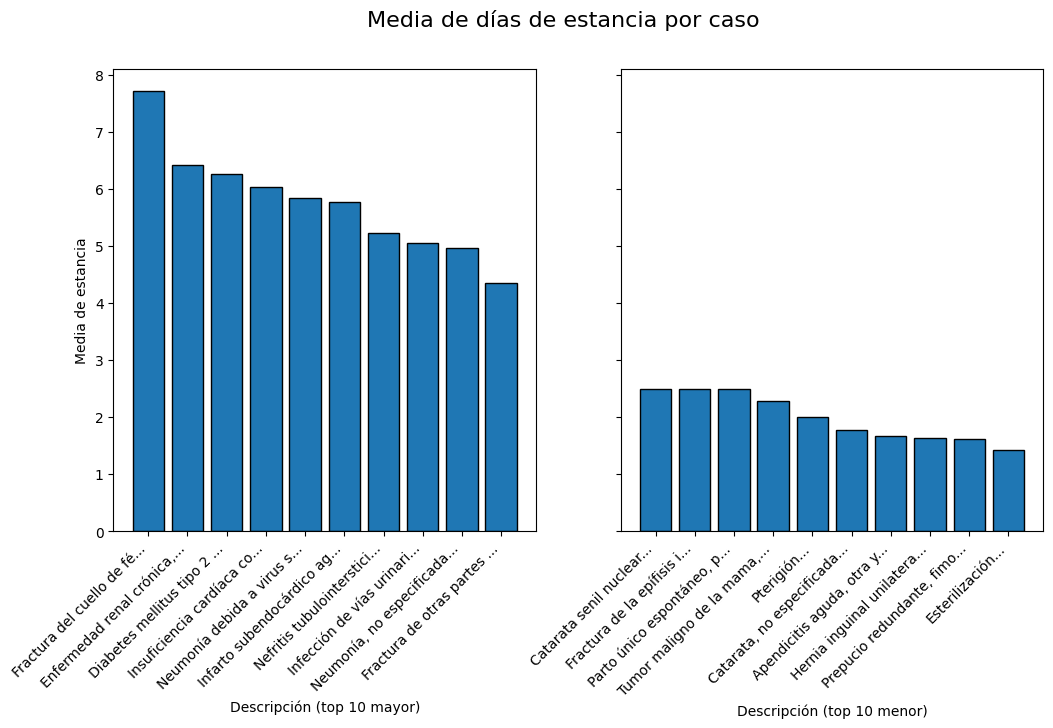

In [544]:
des_grp = (
    df
    .groupby('Descripción')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending=False)
)

# 2) Mostrar tabla con el top 10 más alto
print("Top 10 casos por promedio de estancia:")
display(des_grp.head(10))

# 3) Mostrar tabla con el top 10 más bajo
print("Top 10 casos con menor promedio de estancia:")
display(des_grp.tail(10))


# 4) Gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(12, 6))
fig.suptitle("Media de días de estancia por caso", fontsize = 16)

ax1.bar(des_grp['Descripción'].astype(str).head(10), des_grp['PROM_DIAS_ESTANCIA'].head(10), edgecolor='black')
ax1.set(xlabel = "Descripción (top 10 mayor)", ylabel = "Media de estancia")

ax2.bar(des_grp['Descripción'].astype(str).tail(10), des_grp['PROM_DIAS_ESTANCIA'].tail(10), edgecolor='black')
ax2.set(xlabel = "Descripción (top 10 menor)")

for ax in fig.axes:
    ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.show()

Como se puede observar (y como era de esperarse), dependiendo del primer diagnóstico, los pacientes tienen una media de estancia mayor o menor, con una diferencia significativa en los primeros 30 diagnósticos más repetidos.

- Distribución de la variable Objetivo

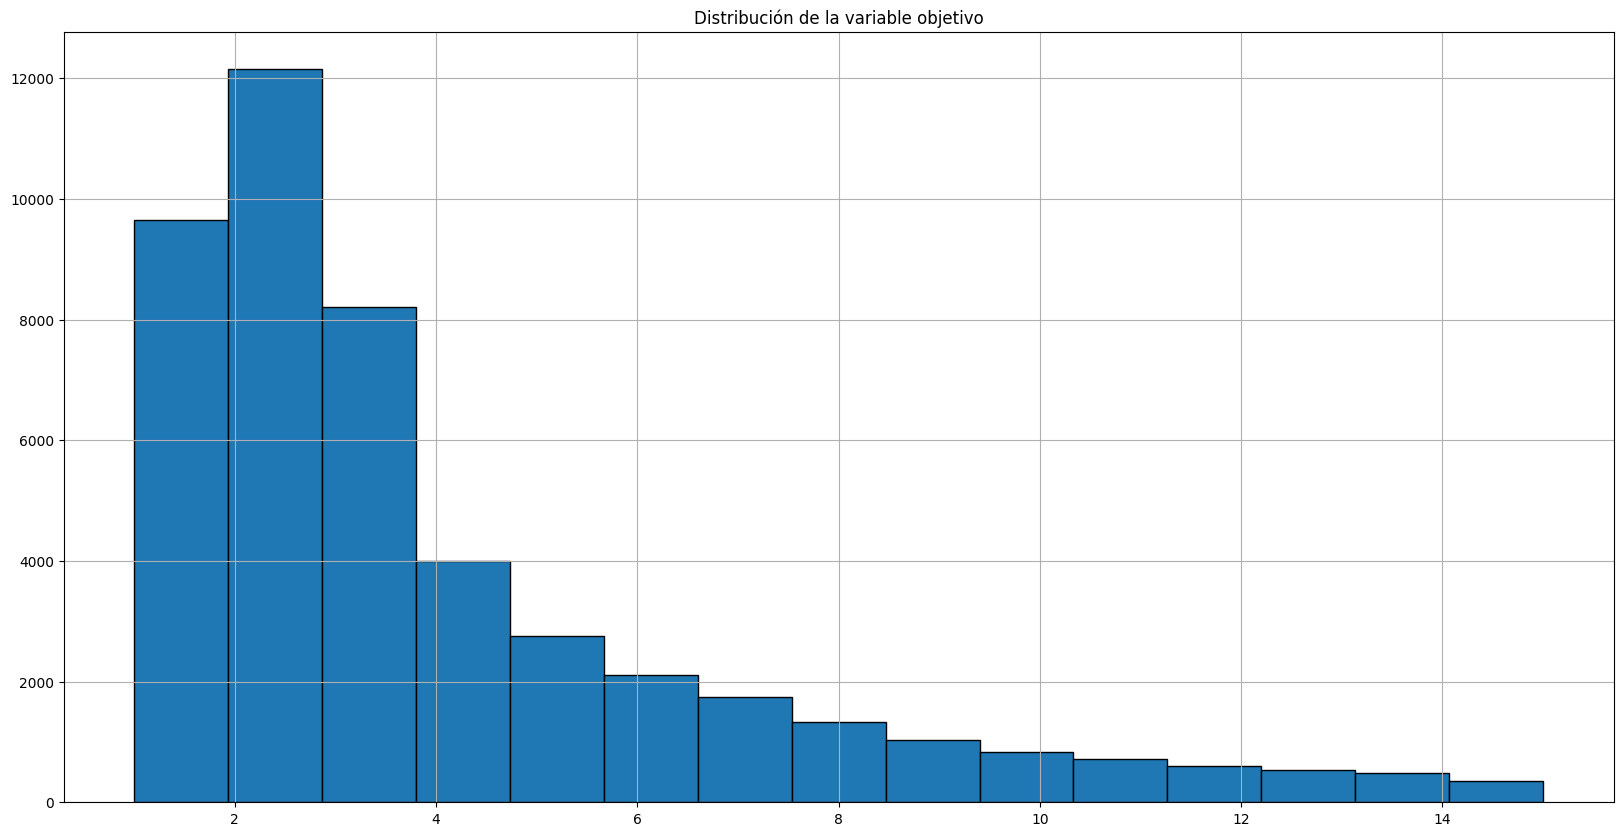

In [545]:
fig = plt.figure(figsize=(20,10))
df['DIAS_ESTANCIA'].hist(bins=15, edgecolor='black')
plt.title("Distribución de la variable objetivo")
plt.savefig("Histograma_variable_objetivo.png", dpi = 300)
plt.show()

Como se puede observar, existe un sesgo hacia la derecha, con una distribución logarítmica normal. Para poder análizar los datos de una mejor manera, a la variable objetivo se le aplicará logaritmo natural

In [546]:
df["DIAS_ESTANCIA_LOG"] = np.log(df["DIAS_ESTANCIA"])

#### 2. Sexo
- Distribución

SEXO  count
0  HOMBRE  15321
1   MUJER  31180

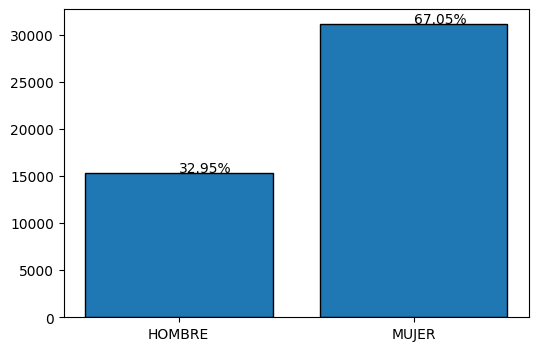

In [547]:
sexo_count = df.groupby("SEXO")["SEXO"].value_counts().to_frame().reset_index()
display(sexo_count)

plt.figure(figsize=(6,4))
plt.bar(sexo_count['SEXO'].astype(str), sexo_count['count'], edgecolor='black')
plt.text("HOMBRE", sexo_count['count'][0]+100, f"{round(sexo_count['count'][0]*100/sexo_count['count'].sum(), 2)}%")
plt.text("MUJER", sexo_count['count'][1]+100, f"{round(sexo_count['count'][1]*100/sexo_count['count'].sum(), 2)}%")
plt.show()

Como se puede observar, la diferencia entre el sexo de los pacientes en los datos a usar es de el doble. Es decir, el 33% aprox de los datos son hombres, y el otro % restante son mujeres. Ahora, ára un arbol de regresión, las variables INDEPENDIENTES no son necesarias ajustarlas, ya que los modelos de este tipo lo pueden manejar a no ser que sea una diferencia extrema (Al igual que el XgBoost y el RandomForest).

- Media de dias de estancia por sexo

Promedio de DIAS_ESTANCIA por SEXO:
  SEXO  PROM_DIAS_ESTANCIA
HOMBRE            4.368318
 MUJER            3.481462


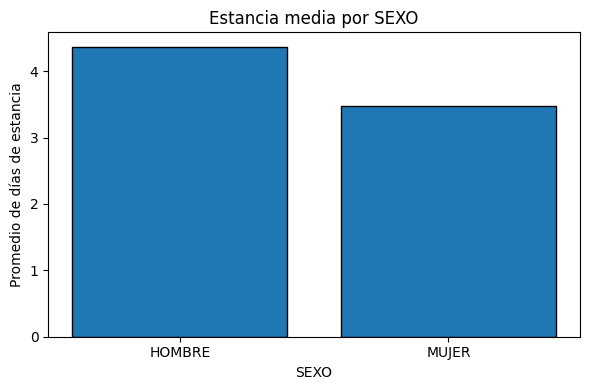

In [548]:
sexo_grp = (
    df
    .groupby('SEXO')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SEXO:")
print(sexo_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sexo_grp['SEXO'].astype(str), sexo_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SEXO')
plt.tight_layout()
plt.show()

En este caso, se puede observar una diferencia de tan solo 1 día en la media de días de estadía para hombres y mujeres, lo que no siguiere una diferencia significativa.

#### 3. Descripción 
métricas principales

In [549]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('Descripción')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["Descripción"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

Descripción

---------------------------------------------------------------------------

Cantidad de únicos:  30
Más Repetido:        Apendicitis aguda, otra y no especificada
Veces Repetido:      4375

---------------------------------------------------------------------------



10 más repetidos

Apariciones
Descripción                                                    
Apendicitis aguda, otra y no especificada                  4375
Desgarro perineal de primer grado durante el parto         3906
Parto único espontáneo, presentación cefálica d...         3039
Atención materna por cicatriz uterina debida a ...         3032
Cálculo de la vesícula biliar con colecistitis ...         2784
Cálculo de la vesícula biliar sin colecistitis             2567
Nefritis tubulointersticial aguda                          2472
Ruptura prematura de las membranas, e inicio de...         2281
Neumonía debida a virus sincitial respiratorio             2215
Diabetes mellitus que se origina con el embarazo           2058

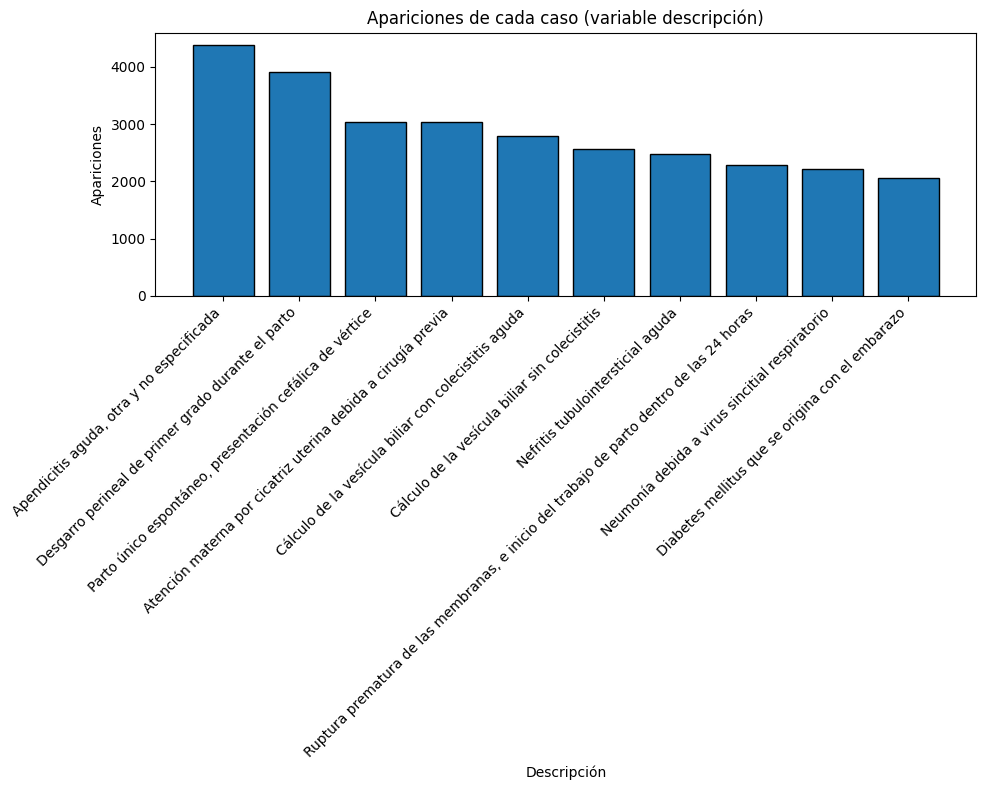

In [550]:
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False).head(10)

display(rep)

rep = rep.reset_index(names='Descripción')

plt.figure(figsize=(10,8))
plt.bar(rep['Descripción'].astype(str), rep['Apariciones'], edgecolor='black')
plt.xlabel('Descripción')
plt.ylabel('Apariciones')
plt.title('Apariciones de cada caso (variable descripción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La diferencia entre la cantidad de veces que aparece cada diagnóstico es bastante, con una diferencia entre el top 10 y el top 1 de aproximadamente 2100 apariciones. Ahora, como se mencionó anteriormente, la diferencia o el desbalance entre las variables para modelos como un arbol no es necesario manejarla (a no ser que sea extrema).

#### 4. Reingreso
- Metricas principales

In [551]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("REINGRESO")["REINGRESO"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('REINGRESO')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["REINGRESO"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

REINGRESO

---------------------------------------------------------------------------

Cantidad de únicos:  2
Más Repetido:        0
Veces Repetido:      43063

---------------------------------------------------------------------------



- Distribución

REINGRESO  Apariciones
0          0        43063
1          1         3438

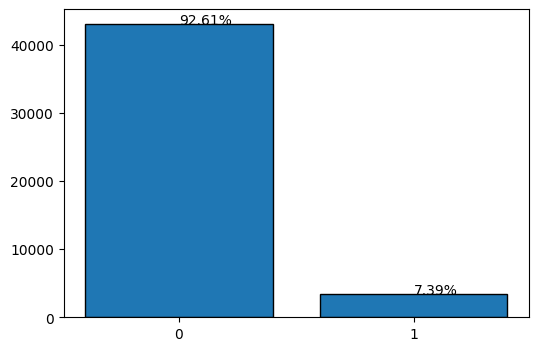

In [552]:
reingreso_count = df.groupby("REINGRESO")['REINGRESO'].value_counts().to_frame(name = "Apariciones").reset_index()
display(reingreso_count)

plt.figure(figsize=(6,4))
plt.bar(reingreso_count['REINGRESO'].astype(str), reingreso_count['Apariciones'], edgecolor='black')
plt.text(0, reingreso_count['Apariciones'][0], f"{round(reingreso_count['Apariciones'][0]*100/reingreso_count['Apariciones'].sum(), 2)}%")
plt.text(1, reingreso_count['Apariciones'][1], f"{round(reingreso_count['Apariciones'][1]*100/reingreso_count['Apariciones'].sum(), 2)}%")
plt.show()

En este caso, la diferencia es extrema. Por esto, es necesario complementar la información con más métricas (y verificar su utilidad con el MCA)

- Media de días de estancia

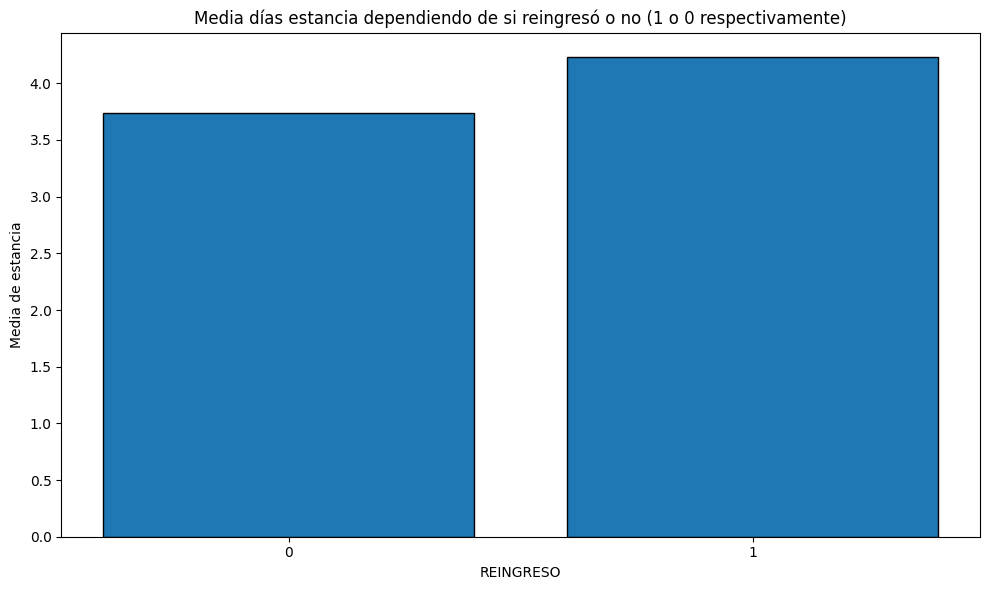

In [553]:
reingreso_agr = df.groupby("REINGRESO")['DIAS_ESTANCIA'].mean().to_frame(name = "Media de estancia").reset_index()
reingreso_agr

plt.figure(figsize=(10,6))
plt.bar(reingreso_agr['REINGRESO'].astype(str), reingreso_agr['Media de estancia'], edgecolor='black')
plt.xlabel('REINGRESO')
plt.ylabel('Media de estancia')
plt.title('Media días estancia dependiendo de si reingresó o no (1 o 0 respectivamente)')
plt.tight_layout()
plt.show()

No existe diferencia significativa dependiendo de si reingresó o no, por ende la variable podría ser poco significativa o incluos podría empeorar modelos

#### 5. SERVICIO_SALUD
- Métricas principales

In [554]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("SERVICIO_SALUD")["SERVICIO_SALUD"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('SERVICIO_SALUD')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["SERVICIO_SALUD"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

SERVICIO_SALUD

---------------------------------------------------------------------------

Cantidad de únicos:  6
Más Repetido:        METROPOLITANO OCCIDENTE
Veces Repetido:      11361

---------------------------------------------------------------------------



- distribución

SERVICIO_SALUD  Apariciones
0     METROPOLITANO CENTRAL         8173
1       METROPOLITANO NORTE         4506
2   METROPOLITANO OCCIDENTE        11361
3     METROPOLITANO ORIENTE         4056
4         METROPOLITANO SUR         8323
5  METROPOLITANO SURORIENTE        10082

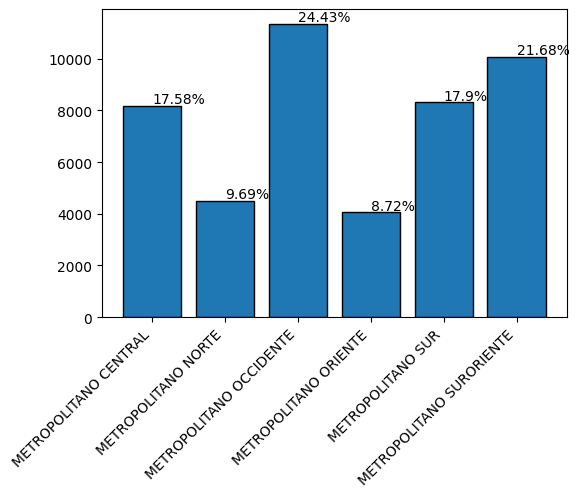

In [555]:
reingreso_count = df.groupby("SERVICIO_SALUD")['SERVICIO_SALUD'].value_counts().to_frame(name = "Apariciones").reset_index()
display(reingreso_count)

plt.figure(figsize=(6,4))
plt.bar(reingreso_count['SERVICIO_SALUD'].astype(str), reingreso_count['Apariciones'], edgecolor='black')
for i in range(len(reingreso_count['SERVICIO_SALUD'])):
    plt.text(reingreso_count['SERVICIO_SALUD'][i], reingreso_count['Apariciones'][i]+100, f'{round(reingreso_count["Apariciones"][i]*100/reingreso_count["Apariciones"].sum(), 2)}%')

plt.xticks(rotation = 45, ha='right')
plt.show()

- Media de estadía por SERVICIO_SALUD

Promedio de DIAS_ESTANCIA por SERVICIO_SALUD:
          SERVICIO_SALUD  PROM_DIAS_ESTANCIA
   METROPOLITANO CENTRAL            3.659733
     METROPOLITANO NORTE            4.080559
 METROPOLITANO OCCIDENTE            3.647390
   METROPOLITANO ORIENTE            4.145710
       METROPOLITANO SUR            3.708999
METROPOLITANO SURORIENTE            3.774846


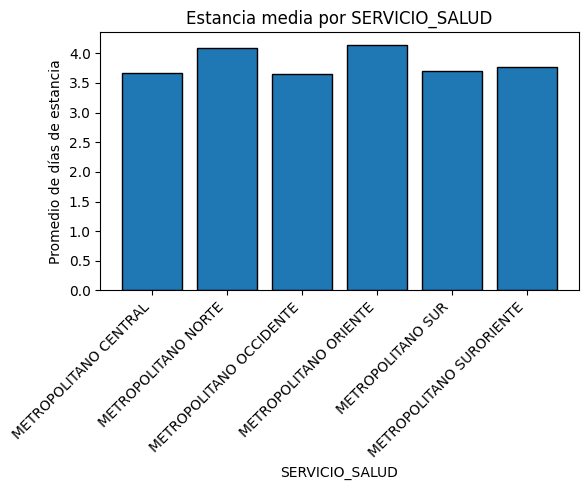

In [556]:
ss_grp = (
    df
    .groupby('SERVICIO_SALUD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SERVICIO_SALUD:")
print(ss_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,5))
plt.bar(ss_grp['SERVICIO_SALUD'].astype(str), ss_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SERVICIO_SALUD')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SERVICIO_SALUD')
plt.tight_layout()
plt.show()

No parece haber una diferencia significativa entre el sector (Servicio salud) y el promedio de estancia de cada uno de estos

### Correlaciones de las variables.
#### Separación entre variables categoricas y numéricas.
De esta manera, se pueden hacer las correlaciones:
- categoria-número
- categoría-categoría
- número-número

In [557]:
# Separación de variables categóricas y numéricas
obj = []
num = []

df["REINGRESO"] = df["REINGRESO"].astype('str')

# Transformación a objetos categóricos
for i in df.columns:
    if df[i].dtype == "object":
        obj.append(i)
        df[i] = pd.Categorical(df[i])
    else:
        num.append(i)

obj2 = obj
df_cat = df[obj]
df_num = df[num]

### Correlación entre variables categóricas y numéricas.
Eta cuadrado se usa metrica del ANOVA (análisis de varianzas). Es utilizada para poder calcular la corerlacion (el nivel de explicación de la desviación estandar de variable respecto a otra variable). En este caso, es la más útil y acertada al momento de trabajar con variables categóricas y numéricas. Utiliza la suma de los cuadrados entre grupos y la suma total de los cuadrados.

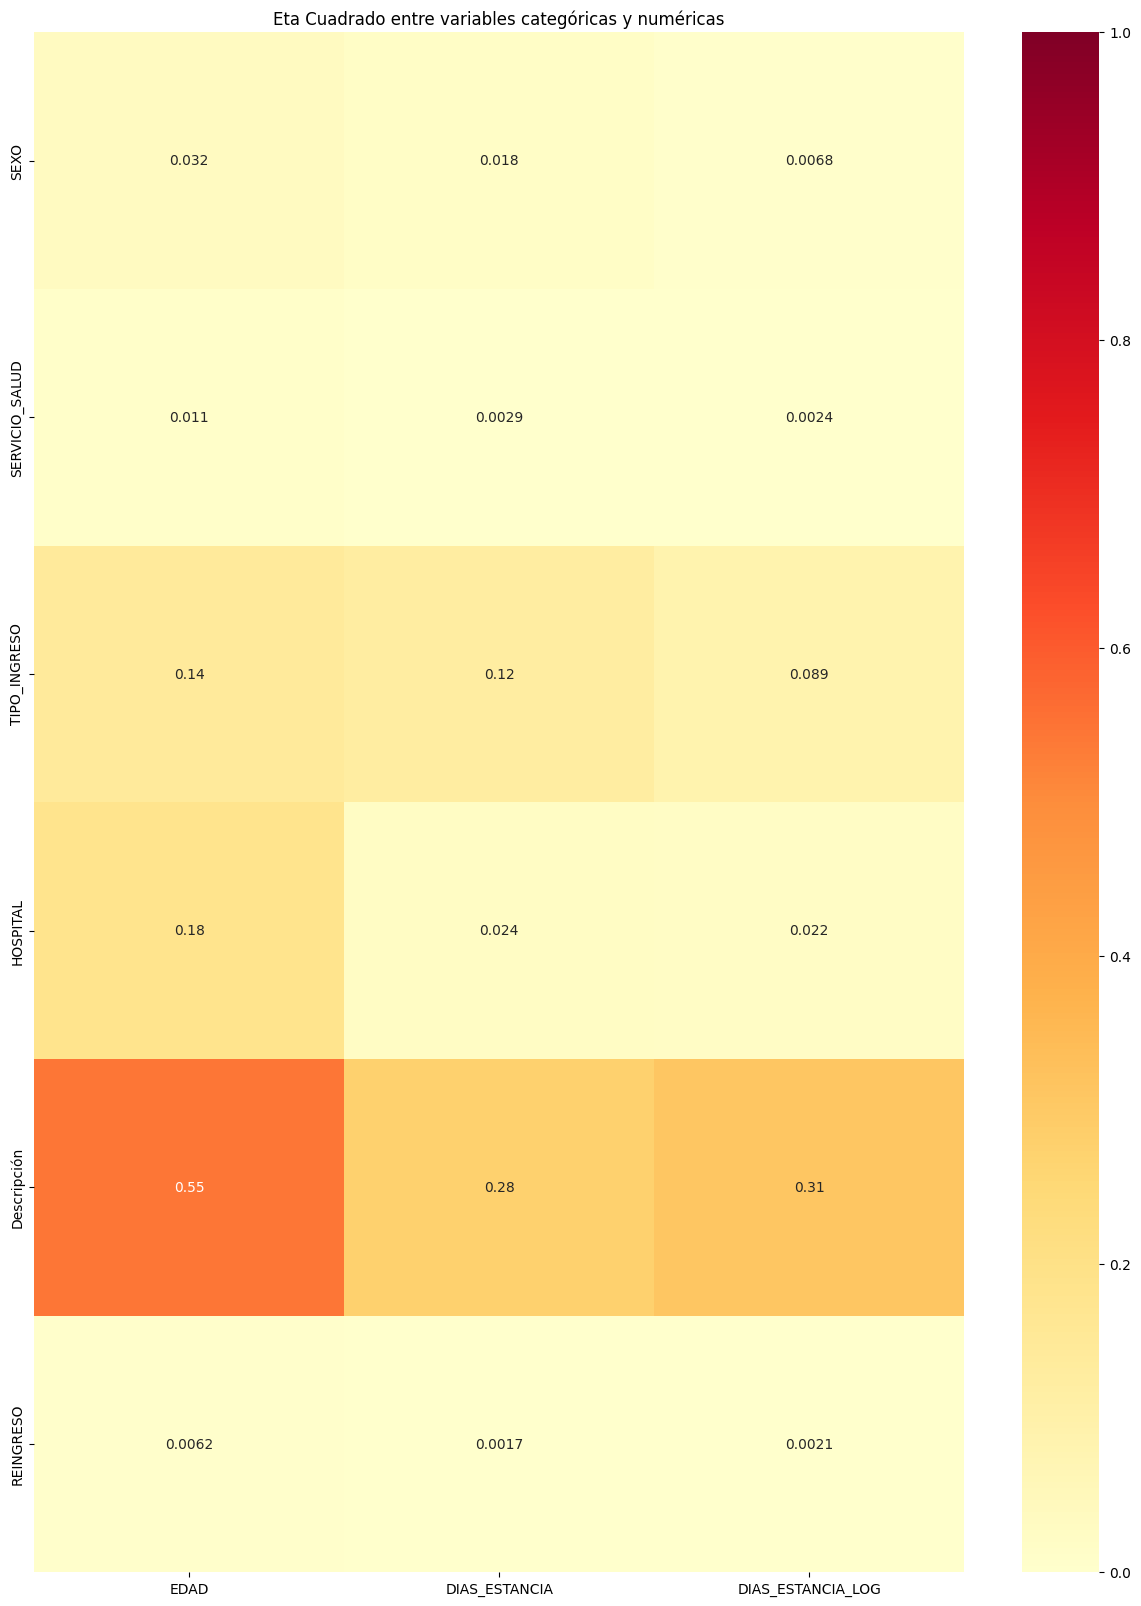

In [558]:

# Función para calcular el Eta caudrado
def eta_squared(df, num_col, cat_col):
    categories = df[cat_col].unique()
    grand_mean = df[num_col].mean()
    ss_between = sum(
        len(df[df[cat_col] == cat]) * (df[df[cat_col] == cat][num_col].mean() - grand_mean) ** 2
        for cat in categories
    )
    ss_total = sum((df[num_col] - grand_mean) ** 2)
    return ss_between / ss_total

# Se define la matriz vacía
corr_matrix = pd.DataFrame(index = obj, columns = num)

# Se asignan los valores aplicando la función definida
for i in obj:
    for j in num:
        eta = eta_squared(df, j, i)
        corr_matrix.loc[i, j] = eta

# Estandarización de la matriz
corr_matrix = corr_matrix.astype(float)
corr_matrix = corr_matrix.fillna(0)

# plot de la matriz
fig = plt.figure(figsize=(15,20))
sns.heatmap(corr_matrix, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Eta Cuadrado entre variables categóricas y numéricas")
plt.savefig("corr_cat_num.png", dpi = 300, bbox_inches = "tight")
plt.show()


En general, ninguna variable tiene una muy alta correlación con la variable objetivo, a excepción de "Descripción" (diagnostico1), pero esta igualmente tiene una baja correlación, por lo que es posible que se necesite más información para poder hacer un modelo significativo. Las variables que si tienen una correlación media, son el diagnostico y la edad, que puede estar dado debido a que diferenctes grupos etarios tienene o son afectados por grupos de enfermedades distintas.

### Correlación solo entre variables categóricas.

Para la medida de correlación se de variables categóricas se usa Cramer's V, que mide la fortaleza de la relación sin dirección, es decir, indica que tan realcionadas están las variables, pero sin decir si es de manera positiva o negativa (debido a que no son valores númericos, no tendría sentido una relación "negativa") Para su calculo se utiliza el Chi cuadrado, la cantidad de observaciones y el menor numero entre las filas y las columnas.

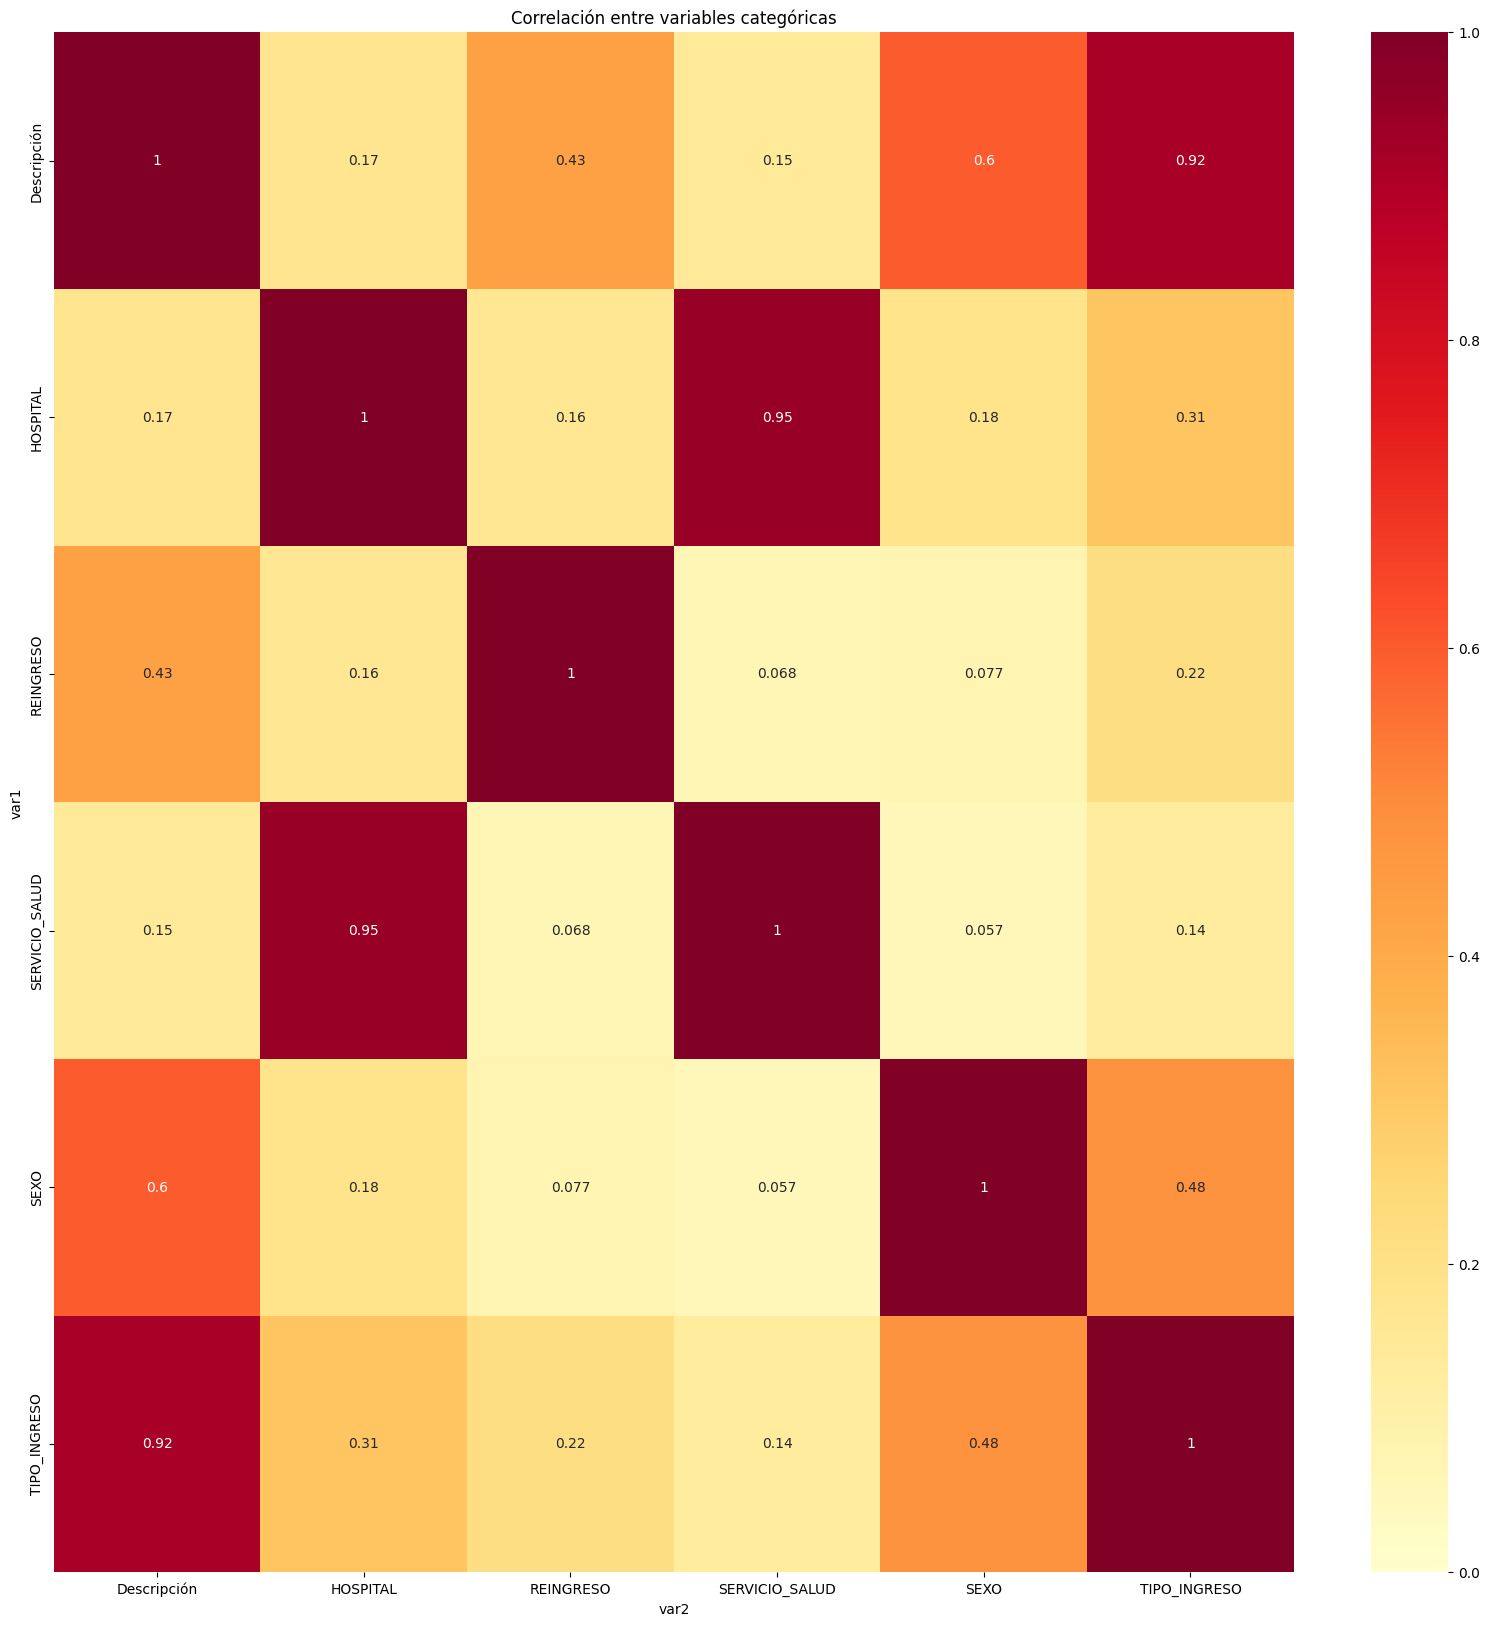

In [559]:
cat_var_prod = list(it.product(obj,obj2, repeat = 1))
result = []

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for i in cat_var_prod:
    result.append((i[0], i[1], cramers_v(df_cat[i[0]], df_cat[i[1]])))

corr_output = pd.DataFrame(result, columns = ["var1", "var2", "Corr"])
corr_output = corr_output.pivot(index = "var1", columns="var2", values = "Corr")
corr_output = corr_output.astype(float)

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_output, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables categóricas")
plt.savefig("corr_cat_cat.png", dpi = 300, bbox_inches = "tight")
plt.show()

Entre las varibales independientes categoricas, hay dos parejas que están muy correlacionadas entre si. La primera y más notoria, es hospital y servicio salud (que es esperable), y se debe a uqe los hospitales están divididos hasta con dirección, por ende, se puede dejar de depender de una de ellas. La otra pareja de variables altamente correlacionada es Sexo y descripción, que puede deberse a que, primero, hay más mujeres que hombres en el dataset, y segundo, a que muchos de los datos GRD son son diagnosticos relacionados a embarazos o partos (enfermedades, complicaciones o similar). Ahora, debido a que la correlacioon no es extremadamente fuerte, y las enfermedades se pueden diferenciar o no por sexo, esta variable no se eliminará.

In [560]:
df_cat.drop(columns = "HOSPITAL", inplace = True)

### Correlación variables numéricas.

En este caso, se usa el metodo de correlación proveniente de la librería de pandas.

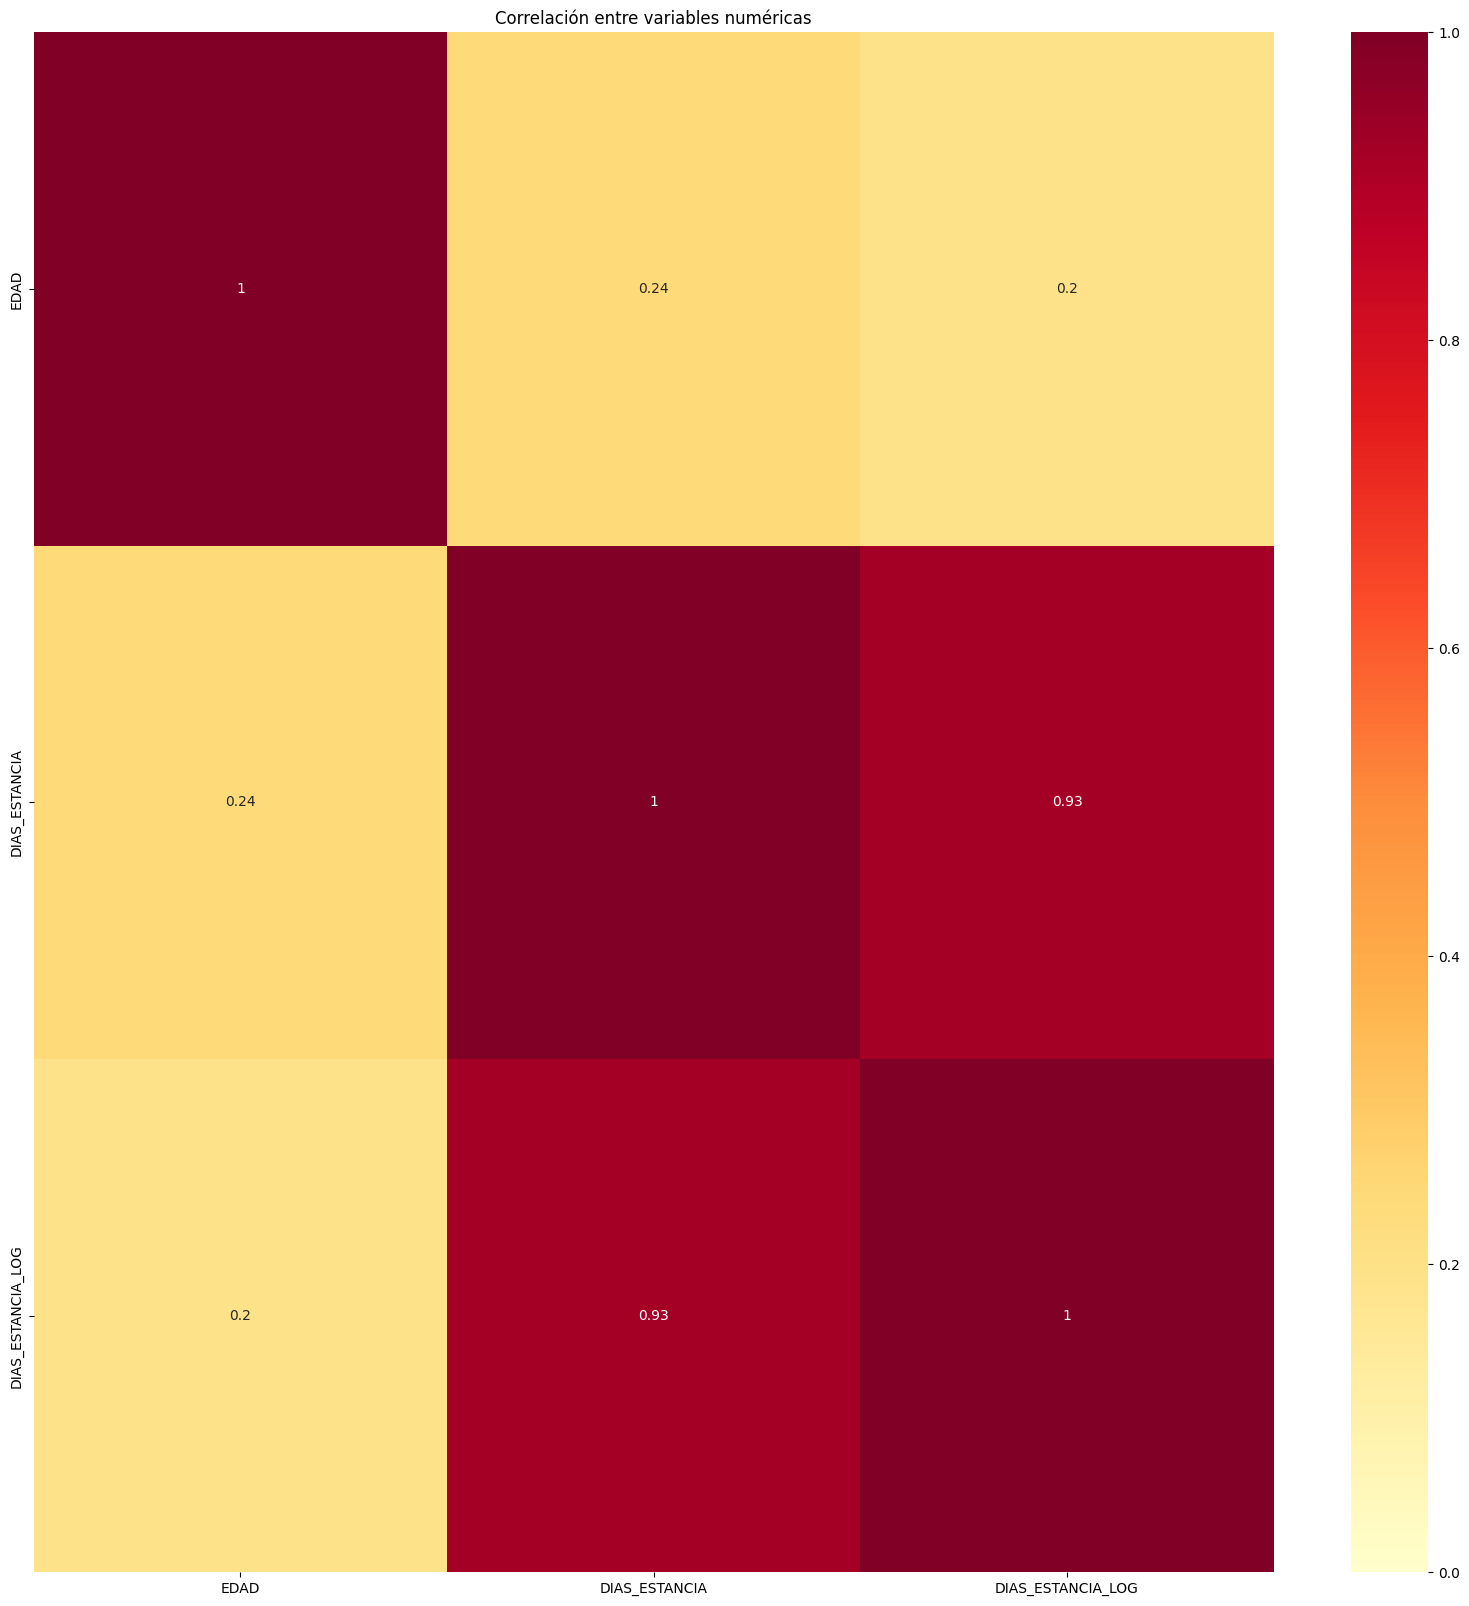

In [561]:
correlations = df_num.corr(method = "pearson")

# Plot de la matriz
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables numéricas")
plt.savefig("corr_num_num.png", dpi = 300, bbox_inches = "tight")
plt.show()

Obviando la correlación esperada (DIAS_ESTANCIA Y DIAS_ESTANCIA_LOG), no existe mucha correlacion entre la variable dependiente y la variable edad, pudiendo concluir lo mismo que con las otras variables predictoras.

## <p style="text-align:center;">Realización del modelo.</p>
#### MCA (Análisis de correspondecias múltiples ), el equivalente al PCA pero para variables categóricas
En caso de arboles de decisión, revisar la colinealidad no es necesario. Por ende, vamos directo al siguiente paso

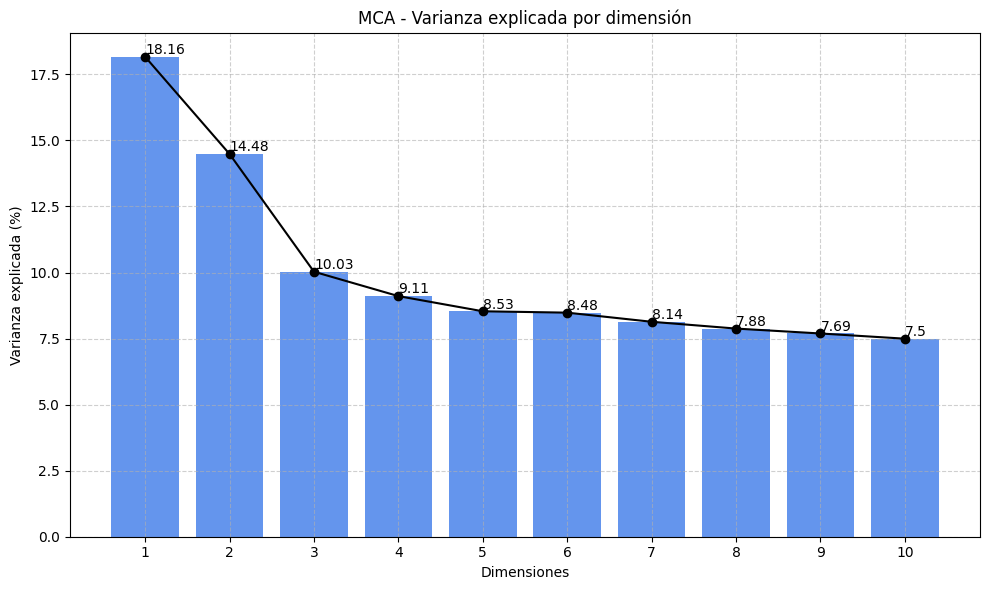

In [562]:
# Aplicar MCA
mca = prince.MCA(n_components=10, random_state=314)
mca = mca.fit(df_cat)

# Obtener la varianza explicada desde eigenvalues_
eigenvalues = mca.eigenvalues_

# Total de inercia (suma de todos los eigenvalues)
total_inertia = sum(eigenvalues)

# Calcular proporción de inercia por dimensión
explained_variance = [v / total_inertia for v in eigenvalues]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), [v * 100 for v in explained_variance], color='cornflowerblue')
plt.plot(range(1, len(explained_variance) + 1), [v * 100 for v in explained_variance], color='black', marker='o')
for v in range(1, len(explained_variance) + 1):
    plt.text(v, explained_variance[v-1]*100+0.1, f'{round(explained_variance[v-1]*100, 2)}')
plt.title("MCA - Varianza explicada por dimensión")
plt.xlabel("Dimensiones")
plt.ylabel("Varianza explicada (%)")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("MCA_varianza_explicada.png", dpi = 300)
plt.show()

Tal como se puede observar, entre las primeras dos dimensiones se explican aproximadamente el 32,6% de la varianza. Como se espera el uso de al menos un 60% de la varianza explicada. Es mejor hacer el arbol con las primeras 5 dimensiones.

In [563]:
# Obtener contribuciones de las categorías a cada dimensión
category_contrib = mca.column_contributions_

# Extraer categorías por dimensión
top_contrib_por_dim = {}
for i in range(10):
    dim = i  # Dimensiones numeradas 0, 1, ..., 9
    top_contrib_por_dim[f"Dim {i+1}"] = (
        category_contrib[dim]
        .sort_values(ascending=False)
    )

# Combinar en una sola tabla
tabla_contribuciones = pd.DataFrame(top_contrib_por_dim)
tabla_contribuciones.fillna(0, inplace = True)
tabla_contribuciones.sort_values(by = "Dim 1", ascending = False)

Dim 1     Dim 2  \
TIPO_INGRESO__OBSTETRICA                            0.242749  0.012302   
SEXO__HOMBRE                                        0.135802  0.003817   
SEXO__MUJER                                         0.066730  0.001875   
Descripción__Desgarro perineal de primer grado ...  0.065005  0.002262   
TIPO_INGRESO__PROGRAMADA                            0.062880  0.283122   
TIPO_INGRESO__URGENCIA                              0.060247  0.148598   
Descripción__Parto único espontáneo, presentaci...  0.052712  0.001655   
Descripción__Atención materna por cicatriz uter...  0.049901  0.002916   
Descripción__Ruptura prematura de las membranas...  0.037236  0.001663   
Descripción__Diabetes mellitus que se origina c...  0.030785  0.003587   
Descripción__Hiperplasia de la próstata             0.026279  0.045032   
REINGRESO__1                                        0.026255  0.064957   
Descripción__Sesión de quimioterapia por tumor      0.025271  0.134404   
Descripción__Diabetes mellitus tipo 2 con compl...  0.012630  0.007948   
Descripción__Apendicitis aguda, otra y no espec...  0.011855  0.042029   
Descripción__Hernia inguinal unilateral o no es...  0.008585  0.015872   
SERVICIO_SALUD__METROPOLITANO OCCIDENTE             0.007869  0.017604   
Descripción__Parto por cesárea electiva             0.007297  0.000663   
Descripción__Cálculo de la vesícula biliar sin ...  0.007100  0.035898   
Descripción__Infarto subendocárdico agudo del m...  0.006717  0.011116   
Descripción__Neumonía debida a virus sincitial ...  0.005972  0.018375   
Descripción__Insuficiencia cardíaca congestiva      0.005784  0.007433   
SERVICIO_SALUD__METROPOLITANO NORTE                 0.005618  0.001122   
Descripción__Infección de vías urinarias, sitio...  0.005323  0.010859   
Descripción__Neumonía, no especificada              0.005043  0.014048   
SERVICIO_SALUD__METROPOLITANO CENTRAL               0.004954  0.004773   
Descripción__Cálculo de la vesícula biliar con ...  0.004025  0.020275   
Descripción__Enfermedad renal crónica, estadio 5    0.003684  0.000767   
Descripción__Nefritis tubulointersticial aguda      0.002648  0.014378   
Descripción__Fractura de otras partes de la pie...  0.002516  0.000266   
Descripción__Prepucio redundante, fimosis y par...  0.002171  0.003299   
REINGRESO__0                                        0.002096  0.005186   
SERVICIO_SALUD__METROPOLITANO ORIENTE               0.001519  0.002306   
Descripción__Fractura de la epífisis inferior d...  0.001116  0.000116   
SERVICIO_SALUD__METROPOLITANO SUR                   0.000983  0.001333   
Descripción__Fractura del cuello de fémur, cerrada  0.000795  0.010266   
Descripción__Esterilización                         0.000564  0.024434   
Descripción__Tumor maligno de la mama, parte no...  0.000563  0.022440   
SERVICIO_SALUD__METROPOLITANO SURORIENTE            0.000533  0.000054   
Descripción__Catarata, no especificada              0.000107  0.000551   
Descripción__Catarata senil nuclear                 0.000058  0.000156   
Descripción__Catarata senil, no especificada        0.000013  0.000084   
Descripción__Pterigión                              0.000012  0.000158   

                                                           Dim 3     Dim 4  \
TIPO_INGRESO__OBSTETRICA                            3.141773e-03  0.022891   
SEXO__HOMBRE                                        1.552030e-03  0.099719   
SEXO__MUJER                                         7.626252e-04  0.048999   
Descripción__Desgarro perineal de primer grado ...  1.057813e-03  0.007992   
TIPO_INGRESO__PROGRAMADA                            2.956615e-02  0.000922   
TIPO_INGRESO__URGENCIA                              2.761410e-03  0.010310   
Descripción__Parto único espontáneo, presentaci...  3.051914e-03  0.000371   
Descripción__Atención materna por cicatriz uter...  1.126866e-07  0.035150   
Descripción__Ruptura prematura de las membranas...  1.016969e-03  0.004780   
Descripción__Diabe

En las primeras 3 dimensiones, el tipo de ingreso obstetricia es la que más contribuye, e impresionantemente, el Sexo hombre es la segunda categoría, contrario a lo que uno hubiera pensado debido a la cantidad de mujheres y la principal causa de explicación por cada dimensión.

Ahora, para entender lo que explican LAS VARIABLES, no solo las categorías por si solas, se resumen una tabla:

In [564]:
# Resumir en variables en vez de solo categorías
tabla_contribuciones["Variable"] = tabla_contribuciones.index.to_series().str.extract(r"^([^_]+(?:_[^_]+)?)")
por_variable = tabla_contribuciones.groupby("Variable").sum()
por_variable.sort_values(by="Dim 1", ascending = False)

Dim 1     Dim 2     Dim 3     Dim 4     Dim 5     Dim 6  \
Variable                                                                     
Descripción     0.381766  0.452951  0.541613  0.647614  0.517699  0.536657   
TIPO_INGRESO    0.365875  0.444022  0.035469  0.034123  0.000845  0.000499   
SEXO            0.202532  0.005692  0.002315  0.148719  0.009340  0.000024   
REINGRESO       0.028351  0.070143  0.319673  0.001495  0.017864  0.000026   
SERVICIO_SALUD  0.021475  0.027192  0.100930  0.168049  0.454251  0.462795   

                   Dim 7     Dim 8     Dim 9        Dim 10  
Variable                                                    
Descripción     0.544170  0.687776  0.842192  1.000000e+00  
TIPO_INGRESO    0.002049  0.015852  0.002544  1.621893e-20  
SEXO            0.002987  0.012855  0.000079  1.053180e-21  
REINGRESO       0.012152  0.000330  0.002453  1.114260e-22  
SERVICIO_SALUD  0.438642  0.283186  0.152731  3.592460e-23

Como era de esperarse, la variable más importante en todos los casos es Descripción. La segunda más importante es tipo_ingreso, aunque solo en las primeras dos dimensiones.
Debido a todo lo mensionado anteriormente, se procede a hacer el arbol de regresión con las 5 dimensiones.

In [565]:
# Aplicar MCA
mca = prince.MCA(n_components=10, random_state=314)
X_mca = mca.fit_transform(df_cat)

# Seleccionar las primeras 5 dimensiones
X_mca_5 = X_mca.iloc[:, :5]

#  Alinear los índices
X_mca_edad = X_mca_5.copy()
X_mca_edad["EDAD"] = df.loc[X_mca_5.index, "EDAD"]
X_mca_edad.columns = X_mca_edad.columns.astype(str)
# Asociar con la variable objetivo
y = df.loc[X_mca_edad.index, "DIAS_ESTANCIA_LOG"]

# Unir componentes MCA + objetivo en un nuevo DataFrame
df_mca_model = X_mca_edad.copy()
df_mca_model["DIAS_ESTANCIA_LOG"] = y

R²:   0.269
RMSE: 0.414
MAE:  0.500


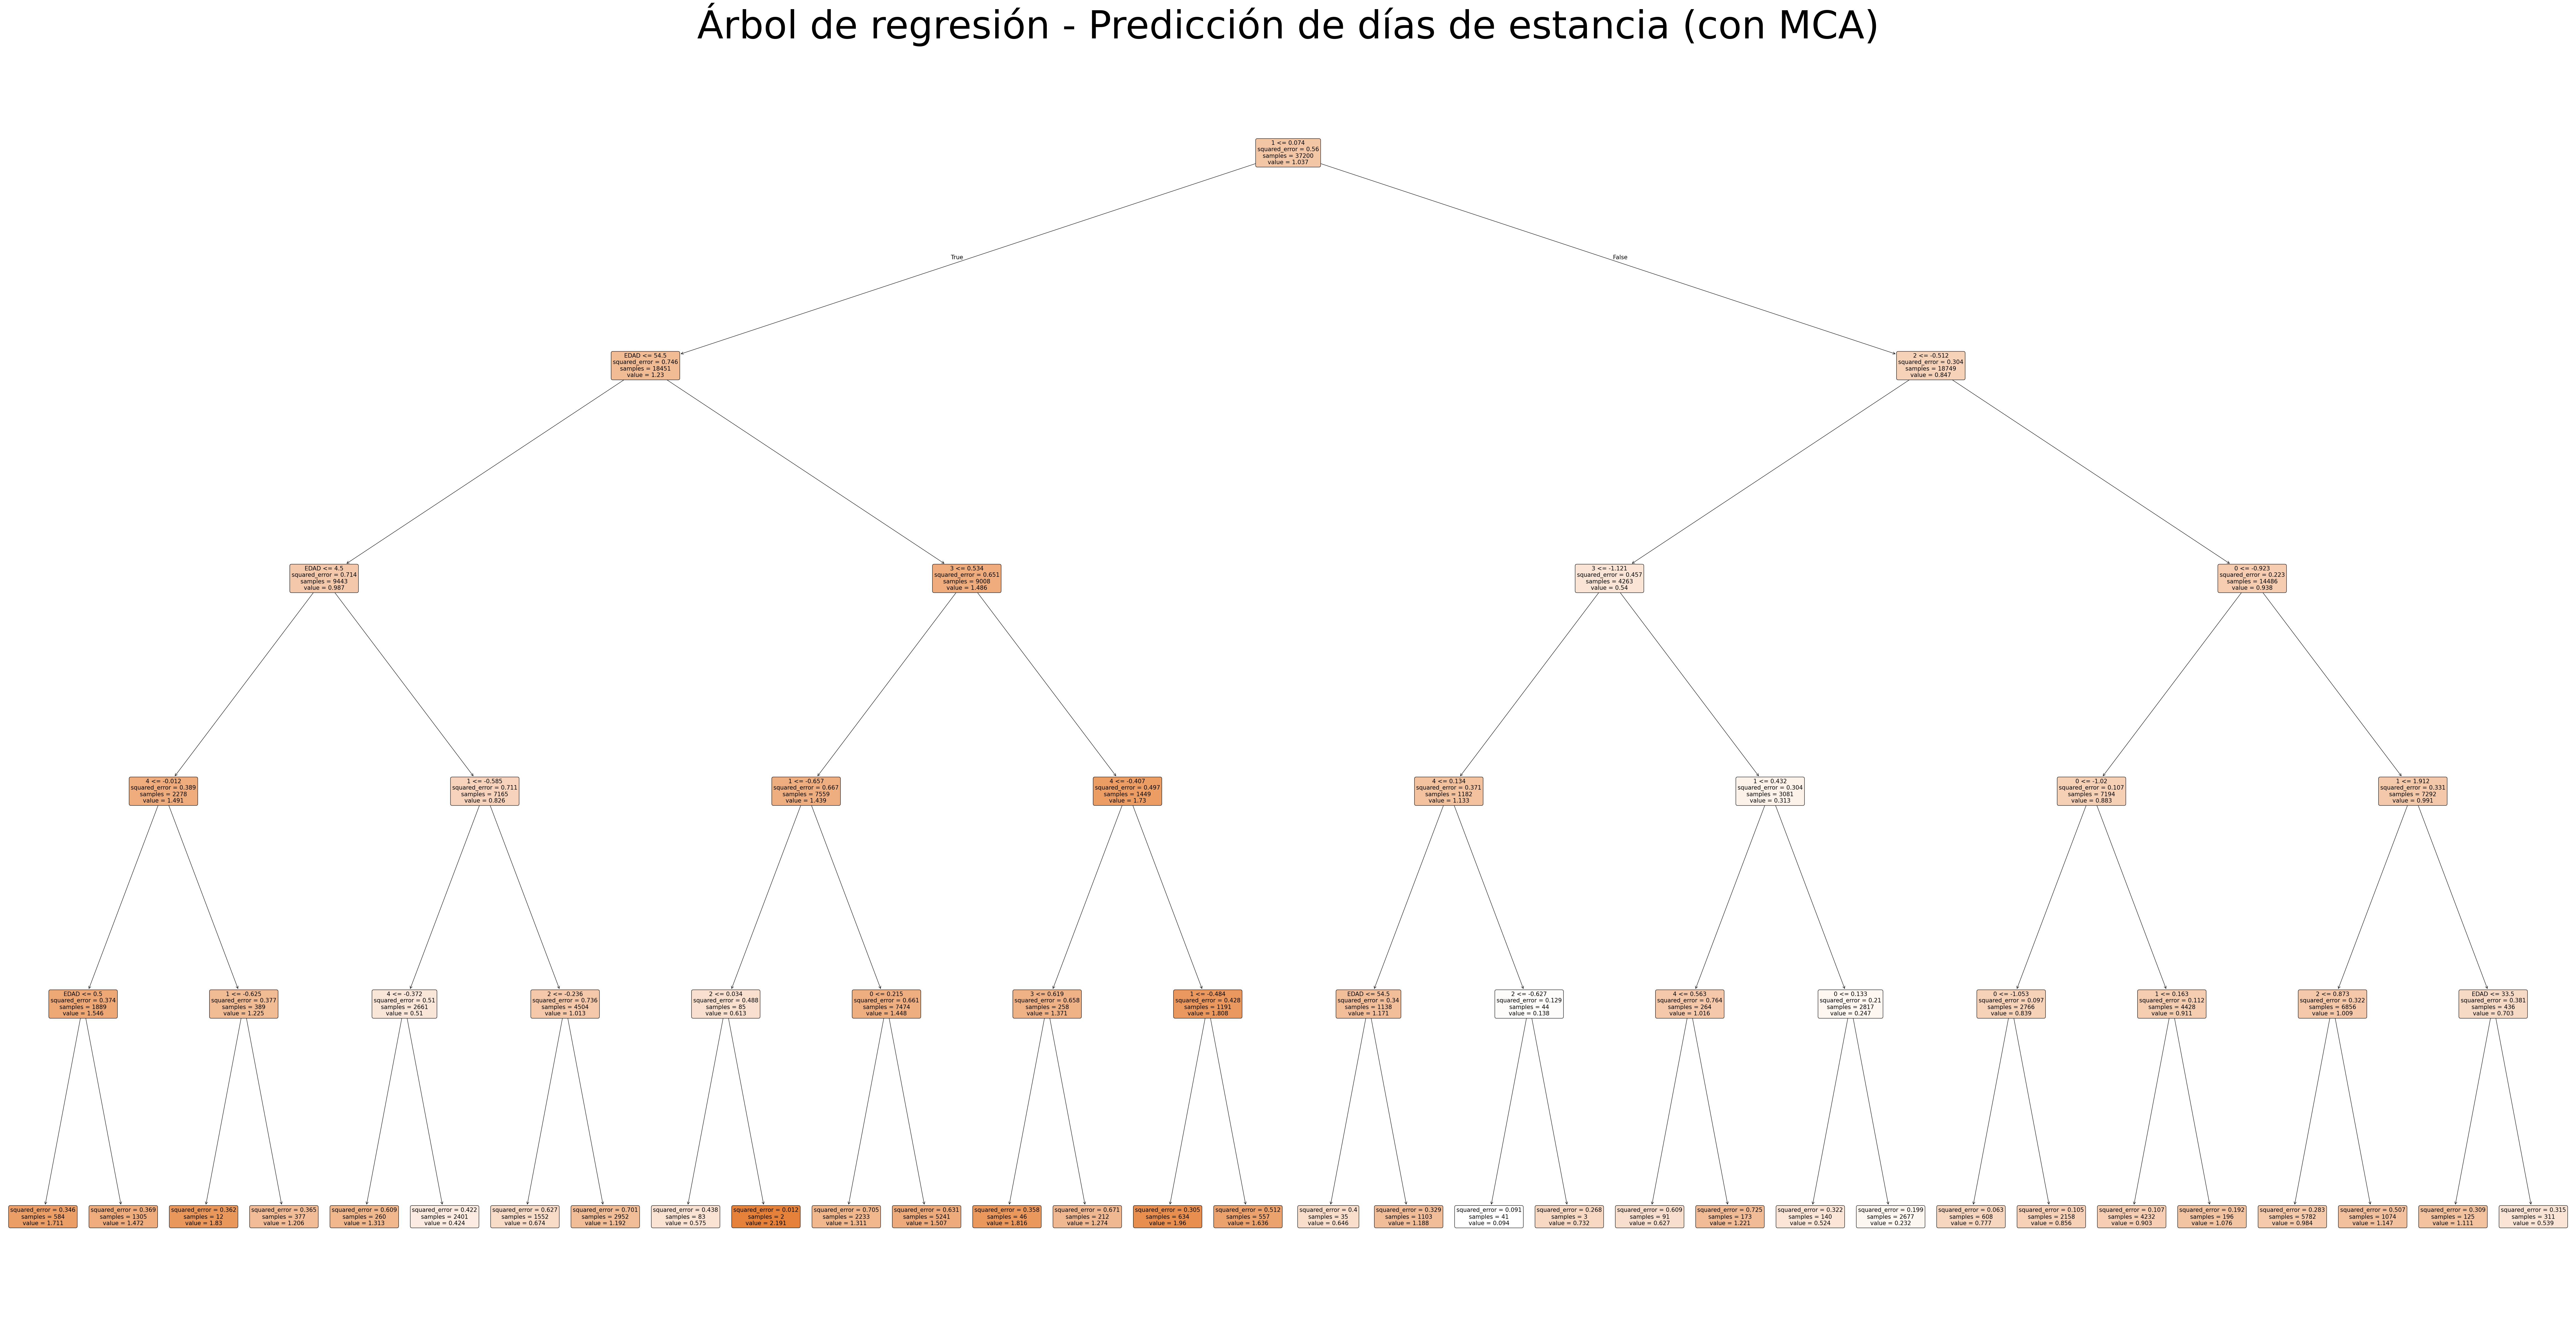

In [566]:
# Separar X (componentes) e y (variable objetivo)
X = df_mca_model.drop(columns=["DIAS_ESTANCIA_LOG"])
y = df_mca_model["DIAS_ESTANCIA_LOG"]
X.columns = X.columns.astype(str)

# División
X_train, X_test, y_train, y_test = train_test_split(
    X_mca_edad, y, test_size=0.2, random_state=314
)

# Modelo
modelo = DecisionTreeRegressor(max_depth=5, random_state=314)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

# Visualizar árbol
plt.figure(figsize=(120, 60))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize= 15)
plt.title("Árbol de regresión - Predicción de días de estancia (con MCA)", fontsize = 100)
plt.savefig('arbol_decision_dias_estancia_mca.png', dpi = 600)
plt.show()

En general, el arbol de regresión tuvo en rendimiento medio-bajo. Esto puede deberse a varios motivos:
Aunque el MAE es relativamente bajo, el R² indica que el modelo aún no captura bien la variabilidad global.

1. Datos demasiado filtrados: Debido a que el grupo de datos es muy pequeño, puede darse una perdida de información muy grande, lo que explicaría tanto la baja correlación entre las variables independientes y la objetivo como el bajo rendimiento del modelo.
2. Ignorar los días sin estancia, o con estancias mayores: Si bien hay outliers marcados, donde como mucho el 9% de los datos son mayores a 15 días de estancia, la cantidad de datos que se tenían disponibles es bastante, por ende el 9% (inicialmente, era equivalente a casi 90.000 datos), y tambien puede haber perdida de información.
3. El modelo tiene muy pocas categorías respecto a las inciales: tal vez, para la cantidad de datos que eran, y la cantidad de diferentes posibles categorías (como más diangosticos iniciales).
4. Hacer modelos distintos por sexo: Como muchos diagnosticos están ligados al sexo (como embarazos en mujeres, o problemas de prostata en los hombres), tal vez sería más acertado hacer modelos diferentes para hombres y mujeres.
5. Poca profundidad: Debido a limitaciones tecnicas, y con el objetivo de poder visualizar el modelo, solo se usó una profundidad de 5, lo que puede generar perdiads de información y limitar el modelo. Es posible que sea mejor usar un modelo con una mayor profundidad máxima, o incluso, sin limitar la profundidad y que el modelo se entrene libremente.

Ahora, se realizará otro arbol, pero con todas las dimensiones (es decir, todas las categorías hasta el momento)

R²:   0.255
RMSE: 0.418
MAE:  0.509


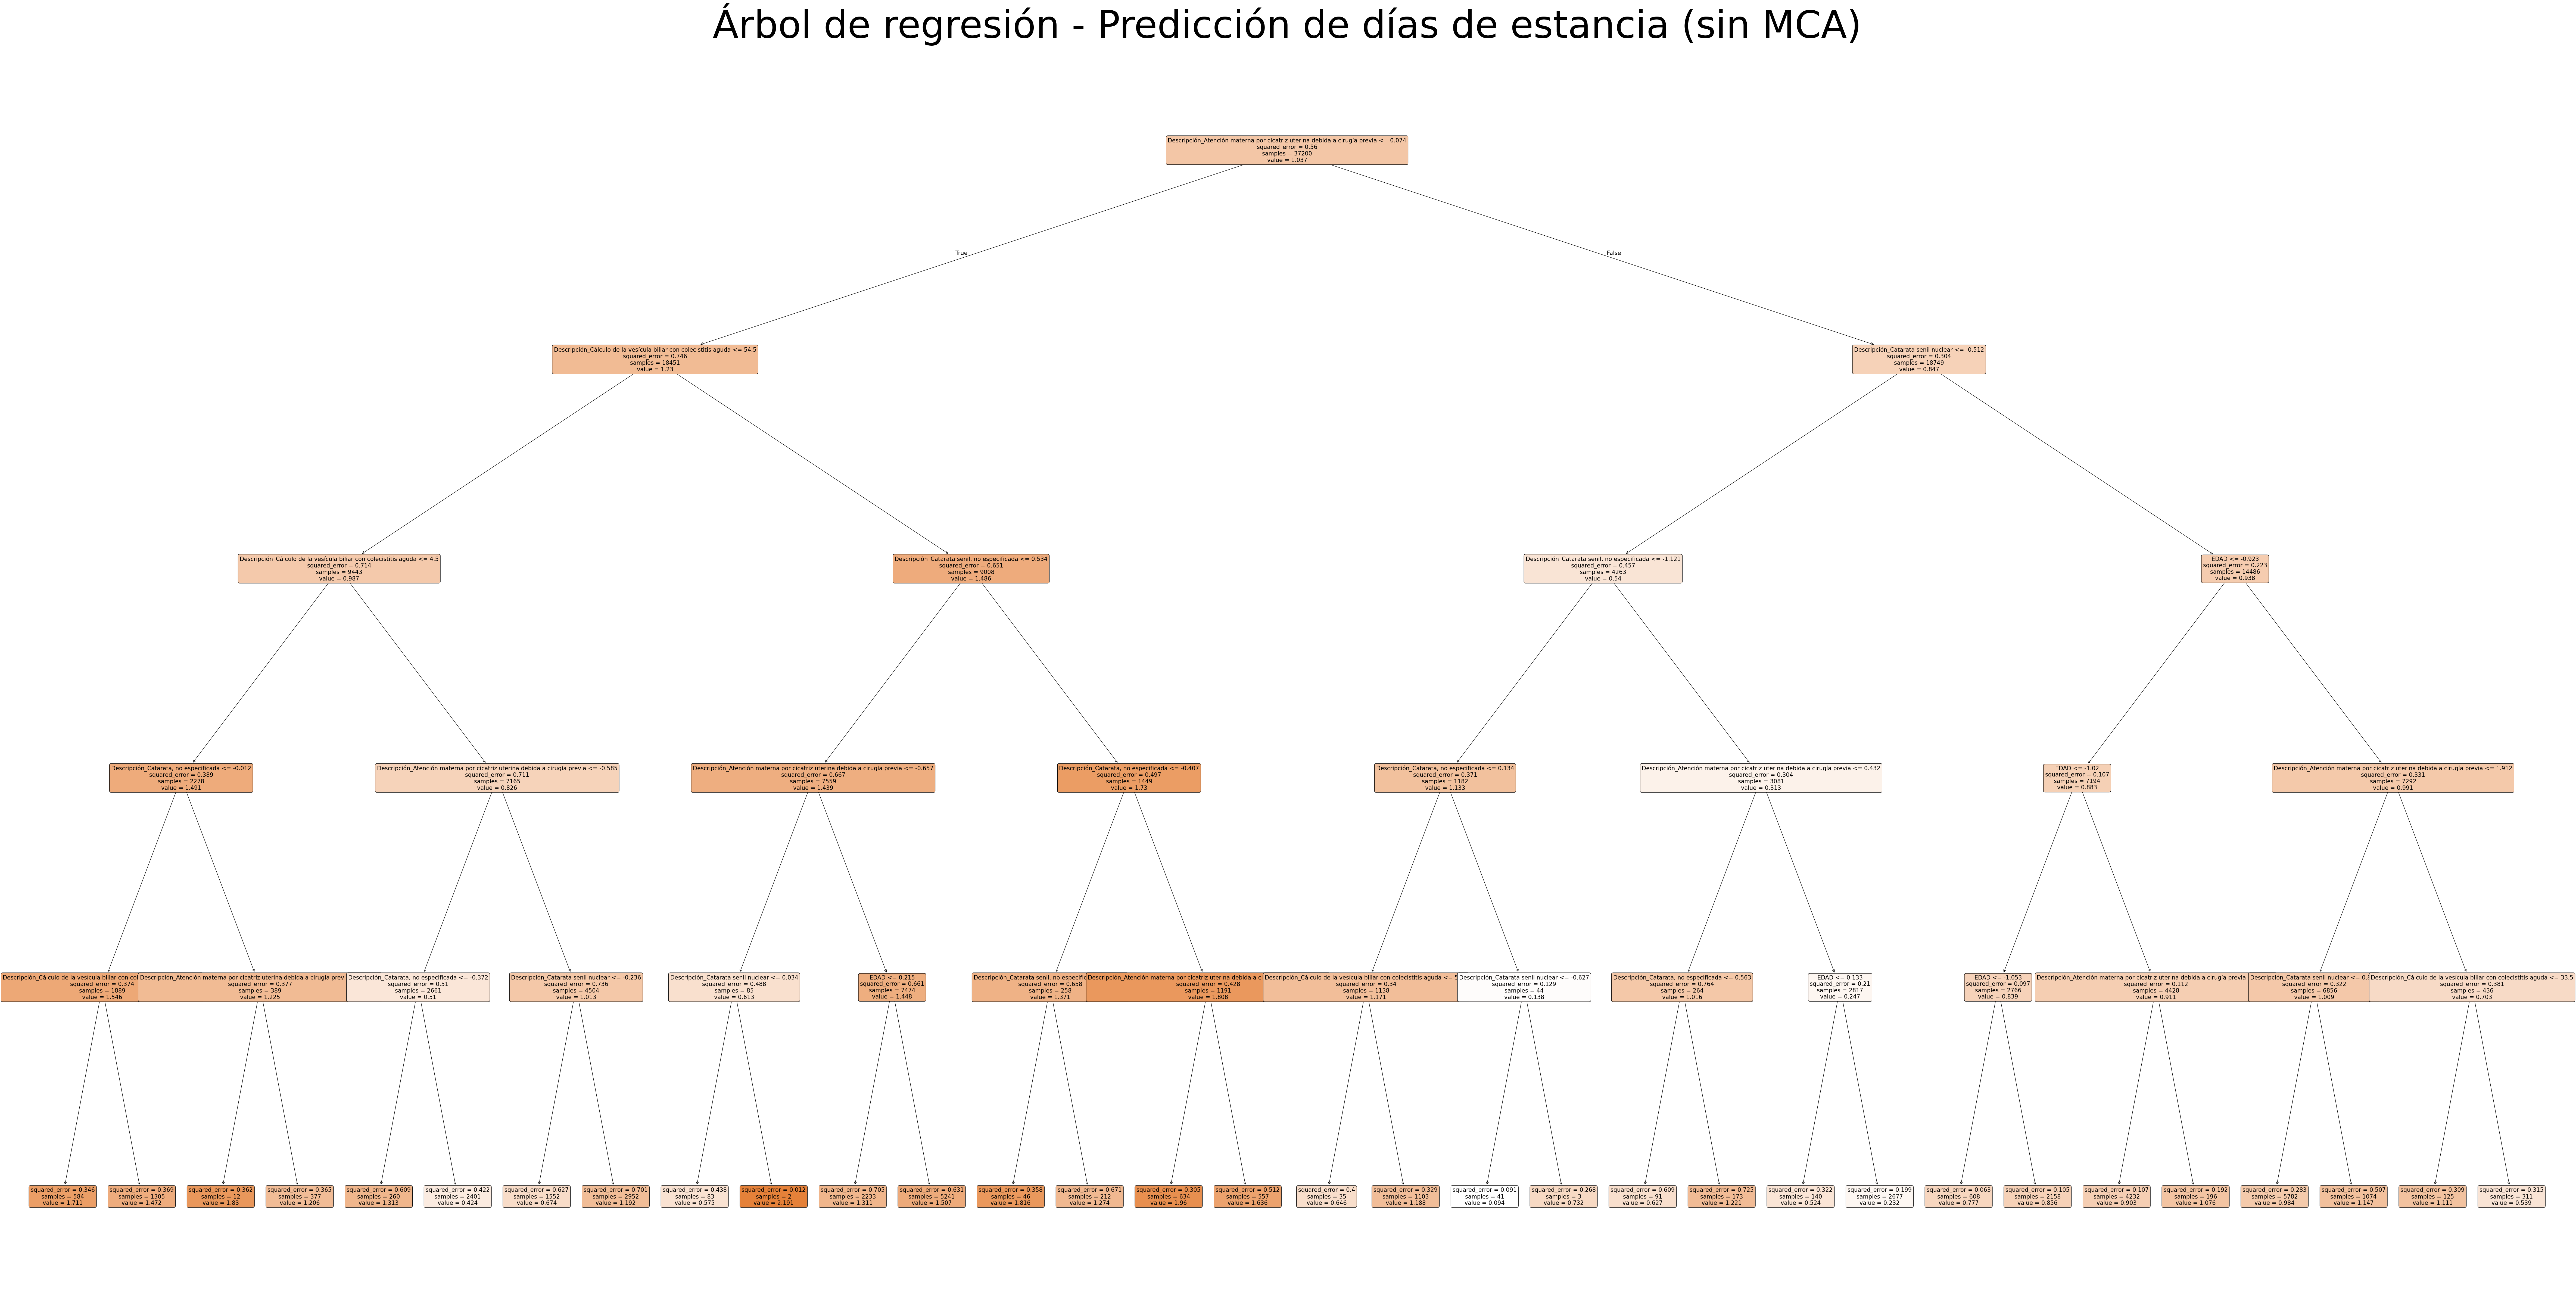

In [567]:
# Variable objetivo
y = np.log(df["DIAS_ESTANCIA"])

# Variables predictoras: categóricas + continua
X_raw = df[[
    "Descripción",
    "TIPO_INGRESO",
    "SEXO",
    "SERVICIO_SALUD",
    "REINGRESO",
    "EDAD"  # variable continua
]]

# One-Hot Encoding para variables categóricas (EDAD no se transforma)
X = pd.get_dummies(X_raw, columns=[
    "Descripción", "TIPO_INGRESO", "SEXO", "SERVICIO_SALUD", "REINGRESO"
], drop_first=True)

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=314
)

# Entrenar modelo
modelo_arbol = DecisionTreeRegressor(max_depth=5, random_state=314)
modelo_arbol.fit(X_train, y_train)

# predicciones
y_pred = modelo_arbol.predict(X_test)

# Predicción y evaluación
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

# Visualizar árbol
plt.figure(figsize=(120, 60))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize= 15)
plt.title("Árbol de regresión - Predicción de días de estancia (sin MCA)", fontsize = 100)
plt.savefig('arbol_decision_dias_estancia.png', dpi = 600)
plt.show()

El modelo de esta manera empeoró (aunque no mucho), por lo que sería más correcto usar los componentes principales para pdoer hacer un modelo, aunque estos no permitirían una visualización por categoría como tal. La ventaja de hacer un arbol usando las variables sin reducción de dimensionalidad es la posibilidad de observar y entender mejor el arbol de manera visual.

# <p style="text-align:center;">Apartado extra.</p>
## <p style="text-align:center;">Diversos arboles.</p>
#### <p style="text-align:center;">Solo para poder comparar diversos casos dentro de lo que nuestras capacidades técnicas lo permitan</p>
Se harán diversos arboles de regresión de distintas maneras (Sin visualizar, ya que dependiendo del arbol, puede que sea una representación ilegible).

- modelo sin eliminar outliers de días de estancia

In [568]:
dftmp = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet")
dftmp.dropna(inplace = True)

dftmp["FECHA_INGRESO"] = dftmp["FECHA_INGRESO"].astype('datetime64[ns]')
dftmp = dftmp.sort_values(by = "FECHA_INGRESO", ascending = True)

dftmp["REINGRESO"] = dftmp["CIP_ENCRIPTADO"].duplicated()
dftmp["REINGRESO"] = dftmp["REINGRESO"].apply(reingreso)

mas_repetidos = dftmp.groupby("Descripción")["Descripción"].value_counts().to_frame("Apariciones").sort_values(by = "Apariciones", ascending = False).head(30).reset_index()
mas_repetidos = np.array(mas_repetidos["Descripción"])
mas_repetidos

dftmp = dftmp[dftmp["Descripción"].isin(mas_repetidos)]
dftmp.reset_index(drop = True, inplace = True)

# Variables predictoras: categóricas + continua
X_raw = dftmp[[
    "Descripción",
    "TIPO_INGRESO",
    "SEXO",
    "SERVICIO_SALUD",
    "REINGRESO",
    "EDAD"  # variable continua
]]

# Variable objetivo
y = np.log1p(dftmp["DIAS_ESTANCIA"]) #Aplicar logaritmo, pero con 1+ variable, porque comienza desde 0

# One-Hot Encoding para variables categóricas (EDAD no se transforma)
X = pd.get_dummies(X_raw, columns=[
    "Descripción", "TIPO_INGRESO", "SEXO", "SERVICIO_SALUD", "REINGRESO"
], drop_first=True)

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=314
)

# Entrenar modelo
modelo_arbol = DecisionTreeRegressor(random_state=314)
modelo_arbol.fit(X_train, y_train)

# predicciones
y_pred = modelo_arbol.predict(X_test)

# Predicción y evaluación
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

R²:   0.545
RMSE: 0.385
MAE:  0.368


En definitiva, este modelo tiene un mejor rendimiento, pero aún deja mucho que desear debido a las metricas.

- Modelo sin reingreso

In [569]:
dftmp = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet")
dftmp.dropna(inplace = True)

mas_repetidos = dftmp.groupby("Descripción")["Descripción"].value_counts().to_frame("Apariciones").sort_values(by = "Apariciones", ascending = False).head(30).reset_index()
mas_repetidos = np.array(mas_repetidos["Descripción"])
mas_repetidos

dftmp = dftmp[dftmp["Descripción"].isin(mas_repetidos)]
dftmp.reset_index(drop = True, inplace = True)

# Variables predictoras: categóricas + continua
X_raw = dftmp[[
    "Descripción",
    "TIPO_INGRESO",
    "SEXO",
    "SERVICIO_SALUD",
    "EDAD"  # variable continua
]]

# Variable objetivo
y = np.log1p(dftmp["DIAS_ESTANCIA"]) #Aplicar logaritmo, pero con 1+ variable, porque comienza desde 0

# One-Hot Encoding para variables categóricas (EDAD no se transforma)
X = pd.get_dummies(X_raw, columns=[
    "Descripción", "TIPO_INGRESO", "SEXO", "SERVICIO_SALUD"
], drop_first=True)

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=314
)

# Entrenar modelo
modelo_arbol = DecisionTreeRegressor(random_state=314)
modelo_arbol.fit(X_train, y_train)

# predicciones
y_pred = modelo_arbol.predict(X_test)

# Predicción y evaluación
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

R²:   0.569
RMSE: 0.363
MAE:  0.361


El modelo sin reingreso mejoró, un poco, respecto al modelo con reingreso, lo que significa que esta variable es solo ruido, y genera variabilidad innecesaria

- Modelo con mca sin reingreso

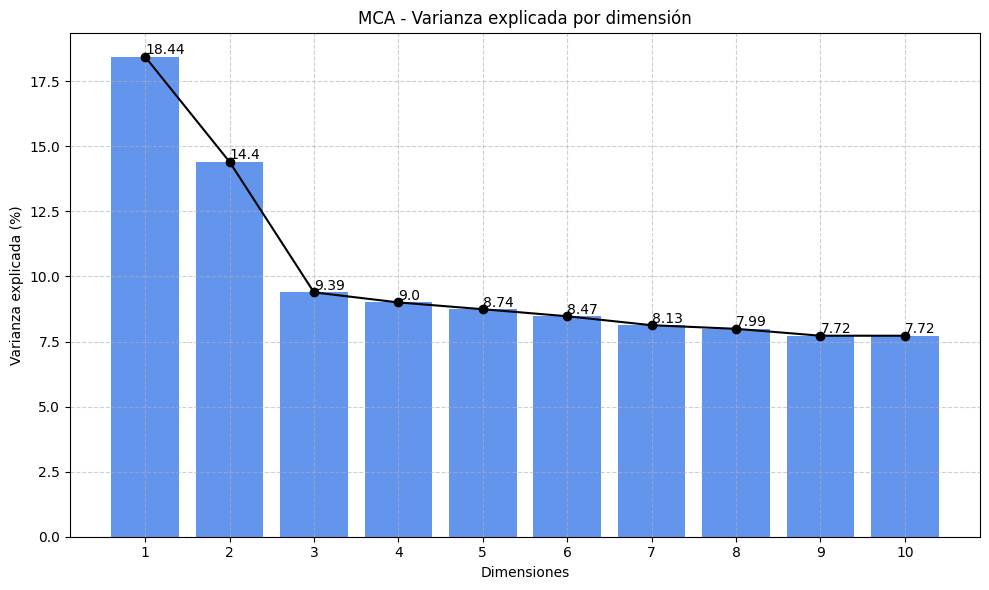

In [570]:
# Aplicar MCA
mca = prince.MCA(n_components=10, random_state=314)
mca_obs = mca.fit(df_cat.drop(columns = "REINGRESO"))

X_mca = mca.fit_transform(df_cat.drop(columns = "REINGRESO"))

# Obtener la varianza explicada desde eigenvalues_
eigenvalues = mca_obs.eigenvalues_

# Total de inercia (suma de todos los eigenvalues)
total_inertia = sum(eigenvalues)

# Calcular proporción de inercia por dimensión
explained_variance = [v / total_inertia for v in eigenvalues]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), [v * 100 for v in explained_variance], color='cornflowerblue')
plt.plot(range(1, len(explained_variance) + 1), [v * 100 for v in explained_variance], color='black', marker='o')
for v in range(1, len(explained_variance) + 1):
    plt.text(v, explained_variance[v-1]*100+0.1, f'{round(explained_variance[v-1]*100, 2)}')
plt.title("MCA - Varianza explicada por dimensión")
plt.xlabel("Dimensiones")
plt.ylabel("Varianza explicada (%)")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Resultado similar al MCA anterior

In [571]:
# Seleccionar las primeras 5 dimensiones
X_mca_5 = X_mca.iloc[:, :5]

#  Alinear los índices
X_mca_edad = X_mca_5.copy()
X_mca_edad["EDAD"] = df.loc[X_mca_5.index, "EDAD"]
X_mca_edad.columns = X_mca_edad.columns.astype(str)
# Asociar con la variable objetivo
y = df.loc[X_mca_edad.index, "DIAS_ESTANCIA_LOG"]

# Unir componentes MCA + objetivo en un nuevo DataFrame
df_mca_model = X_mca_edad.copy()
df_mca_model["DIAS_ESTANCIA_LOG"] = y

# Separar X (componentes) e y (variable objetivo)
X = df_mca_model.drop(columns=["DIAS_ESTANCIA_LOG"])
y = df_mca_model["DIAS_ESTANCIA_LOG"]
X.columns = X.columns.astype(str)

# División
X_train, X_test, y_train, y_test = train_test_split(
    X_mca_edad, y, test_size=0.2, random_state=314
)

# Modelo
modelo = DecisionTreeRegressor(max_depth=5, random_state=314)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

R²:   0.269
RMSE: 0.414
MAE:  0.503


Rendimiento similar, aunque levemente mejor respecto a los errores, por ende, se llega a la misma conclusión respecto la variable REINGRESO